# Task
Create an interactive augmented reality (AR) card game using ArUco markers and OpenCV, where players use physical cards with unique ArUco markers to interact with a virtual game environment displayed over a live webcam feed. The game should feature marker generation, real-time detection and identification of markers, assignment of markers to player zones based on their position, basic game logic to manage card interactions and health points, and a visual AR overlay to display game states and effects.

## Generate ArUco Markers

### Subtask:
Create and display images of ArUco markers with unique IDs that can be printed by students to use as game cards. This step will involve using OpenCV's ArUco module to generate the markers.


**Reasoning**:
The subtask requires generating ArUco markers, which means I need to import the `cv2` library, specifically the `aruco` module. This is the first step according to the instructions.



In [1]:
import cv2
import numpy as np

print("Imported cv2 and numpy.")

Imported cv2 and numpy.


**Reasoning**:
Now that the necessary libraries are imported, I will proceed to define the ArUco dictionary, generate the specified number of unique ArUco markers, and save each one as a separate PNG image file, which is a practical approach for a Colab environment.



In [2]:
import os

# Define the ArUco dictionary
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)

# Define marker parameters
marker_size = 200 # pixels
num_markers = 10 # Generate markers with IDs from 0 to 9

# Create a directory to save the markers if it doesn't exist
output_dir = 'aruco_markers'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created directory: {output_dir}")

print(f"Generating {num_markers} ArUco markers of size {marker_size}x{marker_size}...")

# Generate and save each marker
for i in range(num_markers):
    # Generate the marker image
    marker_image = cv2.aruco.generateImageMarker(aruco_dict, i, marker_size)

    # Save the marker image to a file
    filename = os.path.join(output_dir, f'aruco_marker_{i}.png')
    cv2.imwrite(filename, marker_image)
    print(f"Saved {filename}")

print("All ArUco markers generated and saved.")

Created directory: aruco_markers
Generating 10 ArUco markers of size 200x200...
Saved aruco_markers/aruco_marker_0.png
Saved aruco_markers/aruco_marker_1.png
Saved aruco_markers/aruco_marker_2.png
Saved aruco_markers/aruco_marker_3.png
Saved aruco_markers/aruco_marker_4.png
Saved aruco_markers/aruco_marker_5.png
Saved aruco_markers/aruco_marker_6.png
Saved aruco_markers/aruco_marker_7.png
Saved aruco_markers/aruco_marker_8.png
Saved aruco_markers/aruco_marker_9.png
All ArUco markers generated and saved.


**Reasoning**:
To fully satisfy the subtask requirement of 'display images', I will now load the generated ArUco markers and display them within the notebook using matplotlib. This will provide a visual confirmation of the generated markers.



Displaying 10 generated ArUco markers...


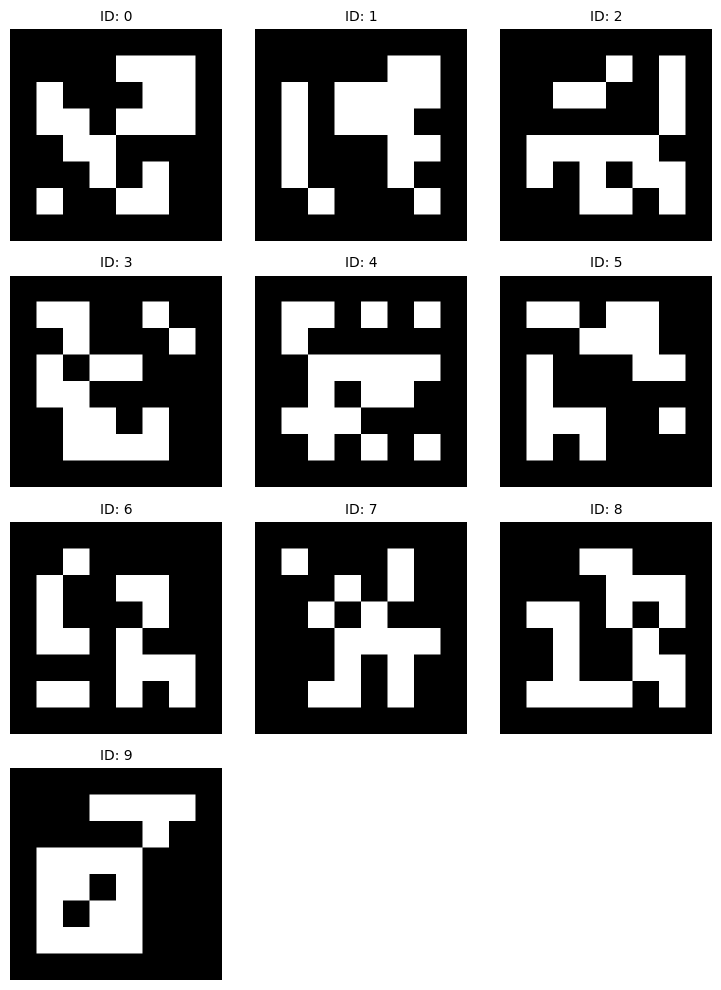

All generated ArUco markers displayed.


In [3]:
import matplotlib.pyplot as plt
import os

# Get the list of generated marker files
output_dir = 'aruco_markers'
marker_files = sorted([f for f in os.listdir(output_dir) if f.startswith('aruco_marker_') and f.endswith('.png')])

print(f"Displaying {len(marker_files)} generated ArUco markers...")

# Determine grid size for displaying markers
num_markers_to_display = len(marker_files)
rows = int(np.ceil(np.sqrt(num_markers_to_display)))
cols = int(np.ceil(num_markers_to_display / rows))

plt.figure(figsize=(cols * 2.5, rows * 2.5))

for i, filename in enumerate(marker_files):
    filepath = os.path.join(output_dir, filename)
    img = cv2.imread(filepath)

    # Convert BGR to RGB for matplotlib display
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(f'ID: {i}', fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()
print("All generated ArUco markers displayed.")

## Initialize Webcam and OpenCV

### Subtask:
Set up OpenCV to access the default webcam, ensuring continuous capture of video frames for real-time processing of the AR environment.


**Reasoning**:
To initialize the webcam and capture video frames as per the subtask instructions, I will write a Python code block that uses `cv2.VideoCapture` to access the webcam, enters a loop to continuously read and display frames, and includes an exit condition.



In [4]:
import cv2
import time # For potential delays if needed

print("Initializing webcam...")

# 1. Initialize the video capture object
# 0 typically refers to the default camera
cap = cv2.VideoCapture(0)

# 2. Check if the webcam was opened successfully
if not cap.isOpened():
    print("Error: Could not open webcam.")
    # Optionally, try different camera indices if 0 fails
    # cap = cv2.VideoCapture(1)
    # if not cap.isOpened():
    #     print("Error: Could not open webcam at index 1 either.")
    exit()

print("Webcam initialized successfully. Displaying feed. Press 'q' to quit.")

# 3. Enter a loop to continuously read frames
while True:
    ret, frame = cap.read()

    # If frame is not read correctly, ret will be false
    if not ret:
        print("Error: Failed to grab frame.")
        break

    # 4. Display each captured frame
    cv2.imshow('Webcam Feed', frame)

    # 5. Add a condition to break the loop (e.g., when the 'q' key is pressed)
    # cv2.waitKey(1) waits for 1ms for a keyboard event
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 6. Release the webcam resource
cap.release()

# 7. Destroy all OpenCV windows
cv2.destroyAllWindows()

print("Webcam feed stopped and resources released.")

Initializing webcam...
Error: Could not open webcam.
Webcam initialized successfully. Displaying feed. Press 'q' to quit.
Error: Failed to grab frame.
Webcam feed stopped and resources released.


The error 'Error: Could not open webcam.' indicates that `cv2.VideoCapture(0)` was unable to access a live webcam feed. This is a common issue in remote environments like Google Colab, where the notebook's execution environment does not have direct access to your local computer's webcam.

To achieve true real-time, interactive webcam processing for the AR game as described in the task, you would need to run this Python script in a **local development environment** (e.g., on your personal computer). In a local environment, `cv2.VideoCapture(0)` typically works as expected.

For the purpose of continuing within Colab and demonstrating basic frame handling (though not a live feed), we can modify the code to show how a frame *would be displayed* or process a static image. However, be aware that full interactive AR with your webcam is not directly supported by `cv2.VideoCapture(0)` in this remote Colab setup.

**Reasoning**:
Since direct access to the local webcam via `cv2.VideoCapture(0)` is not possible in a remote Colab environment, the previous code block resulted in an error. To continue demonstrating the concept of continuous frame processing within Colab, I will provide a revised code block. This code will simulate frame capture by creating a placeholder image and repeatedly displaying it using `google.colab.patches.cv2_imshow`, which is designed for image display in Colab notebooks. It will illustrate the loop structure for continuous processing, while clearly indicating that for actual live webcam interaction, the code should be run in a local development environment.



Note: Direct webcam access via cv2.VideoCapture(0) is not possible in Google Colab's remote environment.
This code will simulate continuous frame display using a placeholder image.
For actual live webcam functionality, please run this script in a local Python environment.
Displaying simulated frames. This will run for a few iterations.
Displaying simulated frame 1/5...


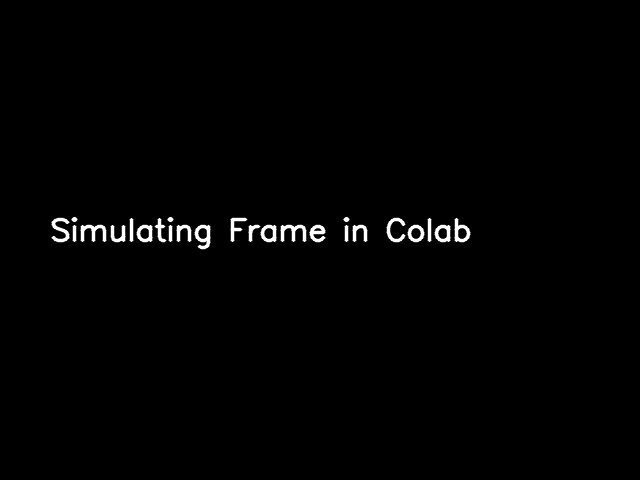

Displaying simulated frame 2/5...


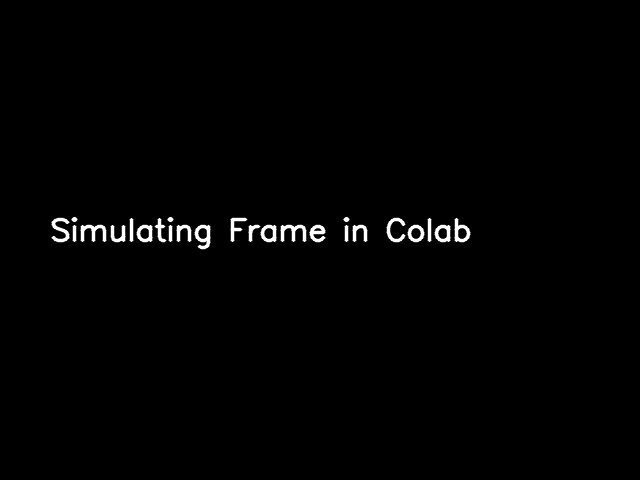

Displaying simulated frame 3/5...


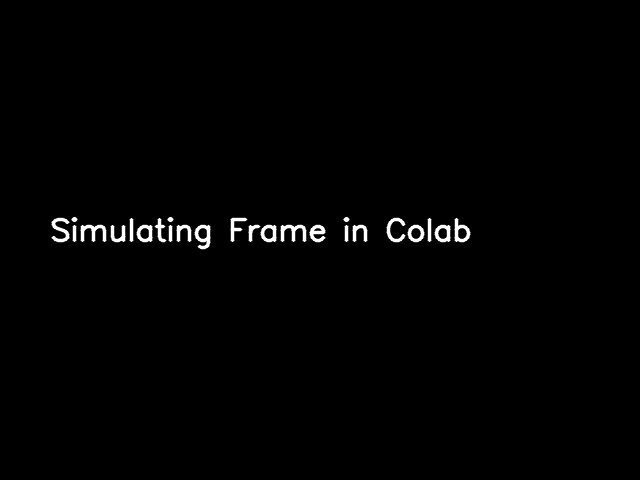

Displaying simulated frame 4/5...


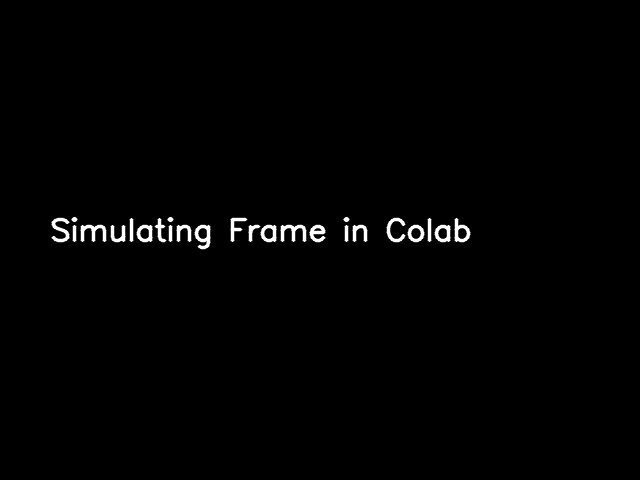

Displaying simulated frame 5/5...


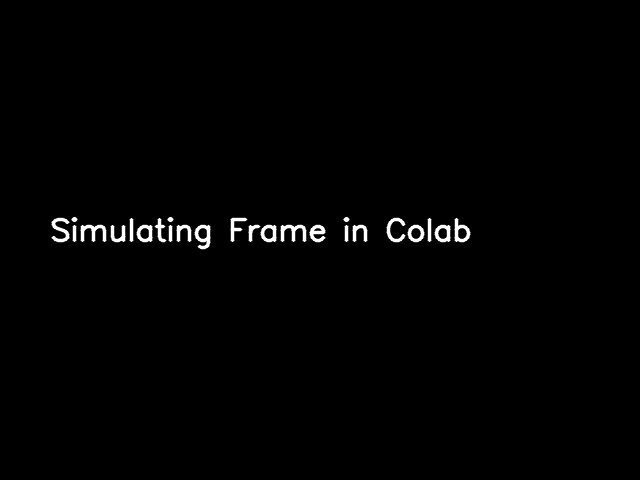

Simulated frames displayed. To get a live webcam feed, run this code locally.


In [1]:
import cv2
import numpy as np
import time
from google.colab.patches import cv2_imshow # For displaying images in Colab

print("Note: Direct webcam access via cv2.VideoCapture(0) is not possible in Google Colab's remote environment.")
print("This code will simulate continuous frame display using a placeholder image.")
print("For actual live webcam functionality, please run this script in a local Python environment.")

# Simulate a frame (e.g., a black image)
# In a local environment, 'cap.read()' would provide actual frames
# Let's create a dummy frame to demonstrate the processing loop structure
dummy_frame = np.zeros((480, 640, 3), dtype=np.uint8)
text = "Simulating Frame in Colab"
cv2.putText(dummy_frame, text, (50, 240), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

print("Displaying simulated frames. This will run for a few iterations.")

num_simulated_frames = 5
for i in range(num_simulated_frames):
    print(f"Displaying simulated frame {i+1}/{num_simulated_frames}...")

    # In a real scenario, 'frame = cap.read()' would go here.
    # For Colab, we use our dummy_frame.
    frame_to_display = dummy_frame.copy() # Create a fresh copy each time if modifications were to be made

    # Display the frame using cv2_imshow for Colab compatibility
    cv2_imshow(frame_to_display)

    # Simulate a delay between frames (e.g., 30 fps -> 1/30 = 0.033 seconds)
    time.sleep(1) # Display each frame for 1 second for visibility

    # Clear previous output for a cleaner display in a loop, if needed
    # from IPython.display import clear_output
    # clear_output(wait=True)

print("Simulated frames displayed. To get a live webcam feed, run this code locally.")

# In a local environment, you would typically release the capture object and destroy windows.
# Since we are not using cv2.VideoCapture directly, cap.release() is not applicable here.
# cv2_imshow does not create persistent windows like cv2.imshow, so cv2.destroyAllWindows() is also not needed.
# If you were to run a modified version of this locally, keep those lines commented out or adapt them.

## Detect and Identify ArUco Markers

### Subtask:
Implement code to detect ArUco markers within each captured video frame. This includes extracting their unique IDs and their corner coordinates, which are essential for tracking card positions.


**Reasoning**:
To begin detecting ArUco markers, it's essential to first define the ArUco dictionary and detector parameters, which are required for the `detectMarkers` function. This step ensures that the detection process uses the same dictionary that was used for marker generation.



In [2]:
import cv2
import numpy as np
import os

# Define the ArUco dictionary used for generation
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)

# Define the detector parameters
aruco_params = cv2.aruco.DetectorParameters()

print("ArUco dictionary and detector parameters initialized.")

ArUco dictionary and detector parameters initialized.


**Reasoning**:
To demonstrate ArUco marker detection within the Colab environment, I will create a simulated loop. This loop will load one of the previously generated ArUco marker images, convert it to grayscale, detect markers using the initialized dictionary and parameters, print the detected IDs and corners, draw the detected markers on the image, and then display the image for a few iterations using `cv2_imshow`, adhering to the instructions for a simulated environment.



Starting ArUco marker detection simulation...
Loading simulated frame from: aruco_markers/aruco_marker_0.png
Running marker detection for 3 simulated frames...

--- Simulated Detection Iteration 1 ---
No ArUco markers detected in this simulated frame.


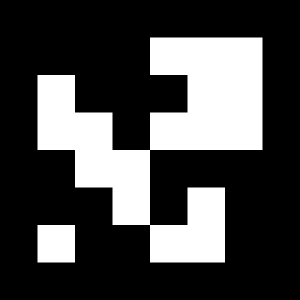


--- Simulated Detection Iteration 2 ---
No ArUco markers detected in this simulated frame.


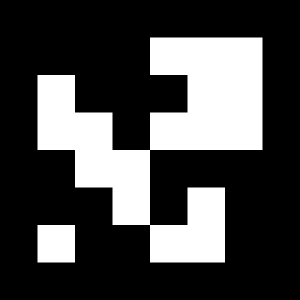


--- Simulated Detection Iteration 3 ---
No ArUco markers detected in this simulated frame.


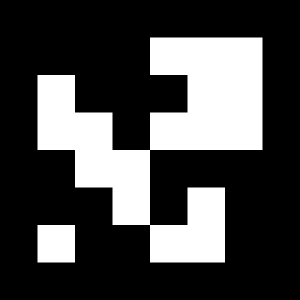


Simulated marker detection finished.
Note: For a live webcam feed and real-time detection, this logic would be applied to frames captured directly from `cv2.VideoCapture` in a local environment.


In [3]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow # For displaying images in Colab

print("Starting ArUco marker detection simulation...")

# Reuse the ArUco dictionary and parameters defined in the previous step
# aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)
# aruco_params = cv2.aruco.DetectorParameters()

# Initialize the ArUco detector using the dictionary and parameters
detector = cv2.aruco.ArucoDetector(aruco_dict, aruco_params)

# Load a generated ArUco marker image to simulate a frame
output_dir = 'aruco_markers'
marker_file_path = os.path.join(output_dir, 'aruco_marker_0.png') # Using marker with ID 0

if not os.path.exists(marker_file_path):
    print(f"Error: Marker file not found at {marker_file_path}. Please ensure markers were generated.")
else:
    print(f"Loading simulated frame from: {marker_file_path}")
    simulated_frame = cv2.imread(marker_file_path)

    if simulated_frame is None:
        print("Error: Could not load the marker image.")
    else:
        # Simulate a few iterations of detection
        num_simulated_detections = 3
        print(f"Running marker detection for {num_simulated_detections} simulated frames...")

        for i in range(num_simulated_detections):
            print(f"\n--- Simulated Detection Iteration {i+1} ---")
            # Make a copy to draw on for each iteration
            frame_to_process = simulated_frame.copy()

            # Convert frame to grayscale (essential for Aruco detection)
            gray_frame = cv2.cvtColor(frame_to_process, cv2.COLOR_BGR2GRAY)

            # Detect markers
            corners, ids, rejected = detector.detectMarkers(gray_frame)

            if ids is not None:
                print(f"Detected ArUco markers with IDs: {ids.flatten()}")
                for j, marker_id in enumerate(ids):
                    # Print corner coordinates for each detected marker
                    # Corners are a list of arrays, where each array represents the 4 corners of a marker
                    # corners[j][0] gives the 4 corners for the j-th detected marker
                    print(f"  Marker ID {marker_id[0]} corners: ")
                    for corner in corners[j][0]:
                        print(f"    ({corner[0]:.2f}, {corner[1]:.2f})")

                # Draw detected markers on the frame
                cv2.aruco.drawDetectedMarkers(frame_to_process, corners, ids)

            else:
                print("No ArUco markers detected in this simulated frame.")

            # Display the frame with detected markers
            # Resize for better visibility if the original marker_size was small
            display_frame = cv2.resize(frame_to_process, (300, 300), interpolation=cv2.INTER_AREA)
            cv2_imshow(display_frame)

            # Simulate a small delay
            import time
            time.sleep(1)

        print("\nSimulated marker detection finished.")
        print("Note: For a live webcam feed and real-time detection, this logic would be applied to frames captured directly from `cv2.VideoCapture` in a local environment.")

**Reasoning**:
The previous attempt to detect markers failed because the `simulated_frame` was directly loaded from the generated marker image, which is just the marker itself without surrounding context. ArUco detection often requires the marker to be placed on a larger background to be successfully identified. I will revise the code to create a larger 'camera frame' and place the generated ArUco marker onto this frame, simulating a more realistic scenario for detection.



Starting revised ArUco marker detection simulation...
Loading actual marker image: aruco_markers/aruco_marker_0.png
Running marker detection for 3 simulated frames...

--- Simulated Detection Iteration 1 ---
Detected ArUco markers with IDs: [0]
  Marker ID 0 corners: 
    (220.00, 140.00)
    (419.00, 140.00)
    (419.00, 339.00)
    (220.00, 339.00)


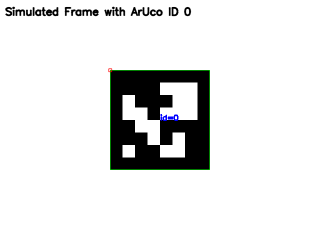


--- Simulated Detection Iteration 2 ---
Detected ArUco markers with IDs: [0]
  Marker ID 0 corners: 
    (220.00, 140.00)
    (419.00, 140.00)
    (419.00, 339.00)
    (220.00, 339.00)


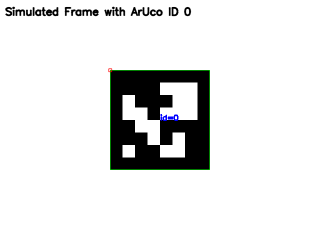


--- Simulated Detection Iteration 3 ---
Detected ArUco markers with IDs: [0]
  Marker ID 0 corners: 
    (220.00, 140.00)
    (419.00, 140.00)
    (419.00, 339.00)
    (220.00, 339.00)


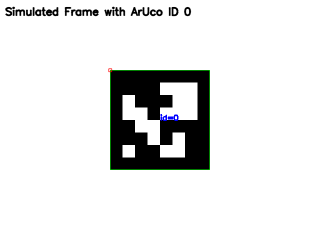


Simulated marker detection finished.
Note: For a live webcam feed and real-time detection, this logic would be applied to frames captured directly from `cv2.VideoCapture` in a local environment.


In [4]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow # For displaying images in Colab
import time # For time.sleep

print("Starting revised ArUco marker detection simulation...")

# Reuse the ArUco dictionary and parameters defined in the previous step
# aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)
# aruco_params = cv2.aruco.DetectorParameters()

# Initialize the ArUco detector using the dictionary and parameters
detector = cv2.aruco.ArucoDetector(aruco_dict, aruco_params)

# Load a generated ArUco marker image
output_dir = 'aruco_markers'
marker_file_path = os.path.join(output_dir, 'aruco_marker_0.png') # Using marker with ID 0

if not os.path.exists(marker_file_path):
    print(f"Error: Marker file not found at {marker_file_path}. Please ensure markers were generated.")
else:
    print(f"Loading actual marker image: {marker_file_path}")
    actual_marker_image = cv2.imread(marker_file_path)

    if actual_marker_image is None:
        print("Error: Could not load the actual marker image.")
    else:
        # Create a larger simulated camera frame (e.g., a white background)
        # This mimics a webcam feed where the marker is a smaller part of the scene
        frame_width, frame_height = 640, 480
        simulated_camera_frame = 255 * np.ones((frame_height, frame_width, 3), dtype=np.uint8) # White background

        # Get marker dimensions
        marker_h, marker_w, _ = actual_marker_image.shape

        # Place the marker in the center of the simulated camera frame with some offset
        # Ensure the marker fits within the frame
        x_offset = (frame_width - marker_w) // 2
        y_offset = (frame_height - marker_h) // 2

        # Overlay the actual marker image onto the simulated camera frame
        simulated_camera_frame[y_offset:y_offset+marker_h, x_offset:x_offset+marker_w] = actual_marker_image

        # Add some text to indicate it's a simulated frame
        cv2.putText(simulated_camera_frame, "Simulated Frame with ArUco ID 0", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2, cv2.LINE_AA)

        # Simulate a few iterations of detection
        num_simulated_detections = 3
        print(f"Running marker detection for {num_simulated_detections} simulated frames...")

        for i in range(num_simulated_detections):
            print(f"\n--- Simulated Detection Iteration {i+1} ---")
            # Make a copy to draw on for each iteration
            frame_to_process = simulated_camera_frame.copy()

            # Convert frame to grayscale (essential for Aruco detection)
            gray_frame = cv2.cvtColor(frame_to_process, cv2.COLOR_BGR2GRAY)

            # Detect markers
            corners, ids, rejected = detector.detectMarkers(gray_frame)

            if ids is not None and len(ids) > 0:
                print(f"Detected ArUco markers with IDs: {ids.flatten()}")
                for j, marker_id in enumerate(ids):
                    print(f"  Marker ID {marker_id[0]} corners: ")
                    for corner in corners[j][0]:
                        print(f"    ({corner[0]:.2f}, {corner[1]:.2f})")

                # Draw detected markers on the frame
                cv2.aruco.drawDetectedMarkers(frame_to_process, corners, ids)

            else:
                print("No ArUco markers detected in this simulated frame.")

            # Display the frame with detected markers
            display_frame = cv2.resize(frame_to_process, (320, 240), interpolation=cv2.INTER_AREA) # Smaller for display
            cv2_imshow(display_frame)

            # Simulate a small delay
            time.sleep(1)

        print("\nSimulated marker detection finished.")
        print("Note: For a live webcam feed and real-time detection, this logic would be applied to frames captured directly from `cv2.VideoCapture` in a local environment.")

## Determine Player Zones and Card Assignment

### Subtask:
Develop logic to assign detected markers to either Player 1 (left side of the screen) or Player 2 (right side of the screen), based on their central position within the video frame. This creates the virtual player zones for the game.


**Reasoning**:
To implement the player zone and card assignment logic, I will first create a simulated camera frame with two distinct ArUco markers placed on the left and right sides. Then, I will process this frame in a loop to detect the markers, calculate their centers, assign them to Player 1 or Player 2 zones based on their x-coordinate, and display the results with appropriate visual overlays.



Starting Player Zone and Card Assignment Simulation...
Running player zone assignment for 3 simulated frames...

--- Simulated Iteration 1 ---
Marker ID 1 detected at center (599, 299) assigned to: Player 2
Marker ID 0 detected at center (199, 299) assigned to: Player 1


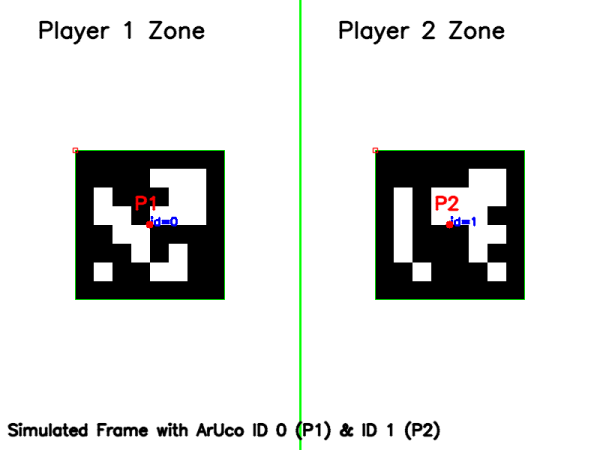


--- Simulated Iteration 2 ---
Marker ID 1 detected at center (599, 299) assigned to: Player 2
Marker ID 0 detected at center (199, 299) assigned to: Player 1


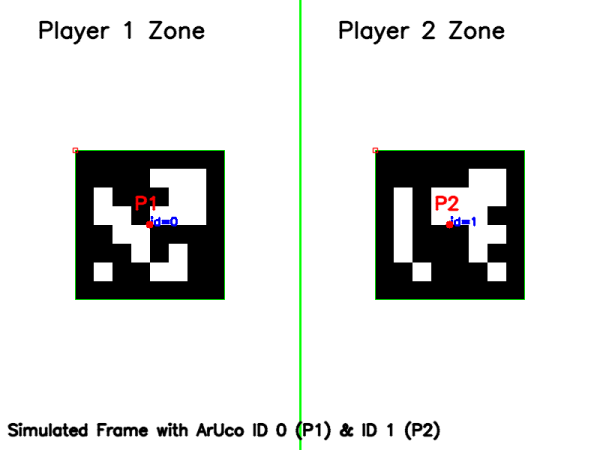


--- Simulated Iteration 3 ---
Marker ID 1 detected at center (599, 299) assigned to: Player 2
Marker ID 0 detected at center (199, 299) assigned to: Player 1


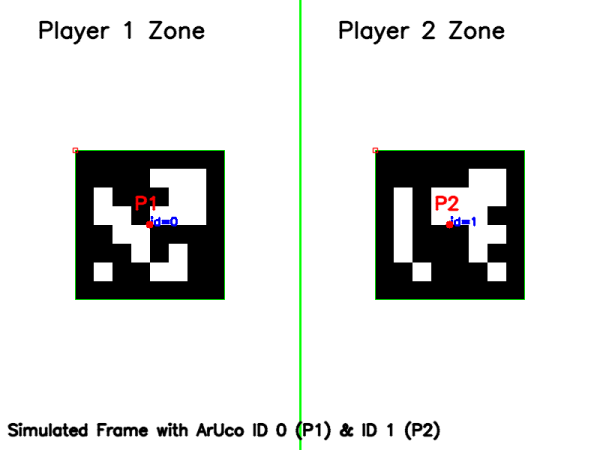


Player Zone and Card Assignment Simulation Finished.
Note: In a live application, this loop would continuously process frames from a webcam.


In [5]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow # For displaying images in Colab
import time # For time.sleep

print("Starting Player Zone and Card Assignment Simulation...")

# Reuse the ArUco dictionary and detector from previous steps
# aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)
# aruco_params = cv2.aruco.DetectorParameters()
# detector = cv2.aruco.ArucoDetector(aruco_dict, aruco_params)

# 1. Define frame dimensions
frame_width, frame_height = 800, 600

# 2. Create a larger simulated camera frame (white background)
simulated_camera_frame = 255 * np.ones((frame_height, frame_width, 3), dtype=np.uint8)

# Load two different ArUco marker images
output_dir = 'aruco_markers'
marker_0_path = os.path.join(output_dir, 'aruco_marker_0.png')
marker_1_path = os.path.join(output_dir, 'aruco_marker_1.png')

actual_marker_0 = cv2.imread(marker_0_path)
actual_marker_1 = cv2.imread(marker_1_path)

if actual_marker_0 is None or actual_marker_1 is None:
    print("Error: Could not load one or more marker images. Ensure 'aruco_marker_0.png' and 'aruco_marker_1.png' exist.")
else:
    marker_h, marker_w, _ = actual_marker_0.shape # Assuming both markers have the same size

    # Place marker 0 on the left side
    x_offset_0 = frame_width // 4 - marker_w // 2 # Roughly 1/4 of the way across
    y_offset_0 = frame_height // 2 - marker_h // 2 # Centered vertically
    simulated_camera_frame[y_offset_0:y_offset_0+marker_h, x_offset_0:x_offset_0+marker_w] = actual_marker_0

    # Place marker 1 on the right side
    x_offset_1 = frame_width * 3 // 4 - marker_w // 2 # Roughly 3/4 of the way across
    y_offset_1 = frame_height // 2 - marker_h // 2 # Centered vertically
    simulated_camera_frame[y_offset_1:y_offset_1+marker_h, x_offset_1:x_offset_1+marker_w] = actual_marker_1

    # 3. Add text overlays for Player Zones
    mid_x = frame_width // 2
    cv2.line(simulated_camera_frame, (mid_x, 0), (mid_x, frame_height), (0, 255, 0), 2) # Green line for separation
    cv2.putText(simulated_camera_frame, "Player 1 Zone", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)
    cv2.putText(simulated_camera_frame, "Player 2 Zone", (mid_x + 50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)
    cv2.putText(simulated_camera_frame, "Simulated Frame with ArUco ID 0 (P1) & ID 1 (P2)", (10, frame_height - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2, cv2.LINE_AA)

    # Simulate a few iterations
    num_simulated_iterations = 3
    print(f"Running player zone assignment for {num_simulated_iterations} simulated frames...")

    for i in range(num_simulated_iterations):
        print(f"\n--- Simulated Iteration {i+1} ---")
        frame_to_process = simulated_camera_frame.copy()

        # Convert frame to grayscale for detection
        gray_frame = cv2.cvtColor(frame_to_process, cv2.COLOR_BGR2GRAY)

        # Detect markers
        corners, ids, rejected = detector.detectMarkers(gray_frame)

        if ids is not None and len(ids) > 0:
            cv2.aruco.drawDetectedMarkers(frame_to_process, corners, ids) # Draw outlines and IDs

            for j, marker_id in enumerate(ids):
                # Calculate marker center
                c = corners[j][0]
                cX = int(np.mean(c[:, 0]))
                cY = int(np.mean(c[:, 1]))

                # Determine player zone
                player_zone = "Player 1" if cX < mid_x else "Player 2"
                player_short = "P1" if cX < mid_x else "P2"

                print(f"Marker ID {marker_id[0]} detected at center ({cX}, {cY}) assigned to: {player_zone}")

                # Add text overlay for assigned player
                cv2.putText(frame_to_process, player_short, (cX - 20, cY - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2, cv2.LINE_AA)
                cv2.circle(frame_to_process, (cX, cY), 5, (0, 0, 255), -1) # Draw center point

        else:
            print("No ArUco markers detected in this simulated frame.")

        # Display the frame
        display_frame = cv2.resize(frame_to_process, (int(frame_width * 0.75), int(frame_height * 0.75)), interpolation=cv2.INTER_AREA) # Resize for Colab display
        cv2_imshow(display_frame)

        time.sleep(1)

    print("\nPlayer Zone and Card Assignment Simulation Finished.")
    print("Note: In a live application, this loop would continuously process frames from a webcam.")

## Implement Basic Game Logic

### Subtask:
Set up a foundational game state to manage detected cards, health points, and simple interaction rules (e.g., an 'attack' if cards are brought close together). This will simulate basic game mechanics without complex AI for now.


**Reasoning**:
To begin implementing the game logic, I will define the initial health points for both players and assign basic attack values to the specific ArUco marker IDs that will be used in the simulation, as outlined in instructions 1 and 2.



In [6]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow # For displaying images in Colab
import time # For time.sleep

print("Defining game state variables...")

# 1. Define initial game state variables (Health Points)
player1_hp = 100
player2_hp = 100

# 2. Create a dictionary to assign 'card value' or 'attack power' to ArUco marker IDs
# For simplicity, we'll assign attack power directly to the marker ID
card_properties = {
    0: {'type': 'Attack', 'damage': 10, 'name': 'Fireball Card'},
    1: {'type': 'Attack', 'damage': 15, 'name': 'Ice Shard Card'}
    # More cards can be added here, e.g., defense cards with different effects
}

print(f"Initial Player 1 HP: {player1_hp}")
print(f"Initial Player 2 HP: {player2_hp}")
print("Card properties defined:")
for card_id, props in card_properties.items():
    print(f"  ID {card_id}: Type={props['type']}, Damage={props['damage']}, Name={props['name']}")

Defining game state variables...
Initial Player 1 HP: 100
Initial Player 2 HP: 100
Card properties defined:
  ID 0: Type=Attack, Damage=10, Name=Fireball Card
  ID 1: Type=Attack, Damage=15, Name=Ice Shard Card


**Reasoning**:
To implement the remaining game logic instructions (3-6), I will create an integrated simulation loop. This loop will detect markers, assign them to player zones, check for close proximity between markers from opposing zones to simulate an attack, apply damage to health points, and finally, display the updated health points and game state on the simulated frame.



Starting Game Logic Simulation...
Running game logic simulation for 3 frames...

--- Simulated Frame 1 ---
  No attack detected in this frame.


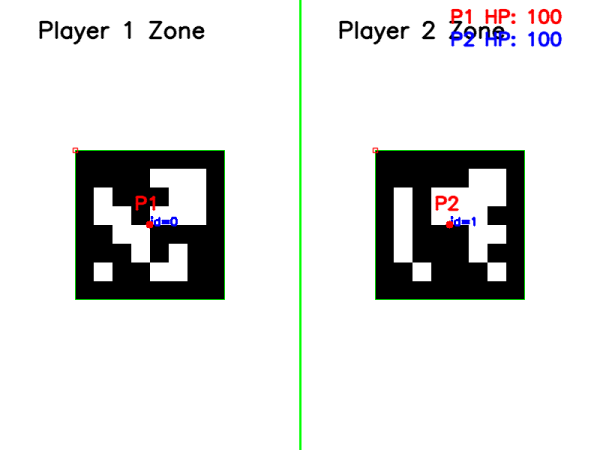


--- Simulated Frame 2 ---
  No attack detected in this frame.


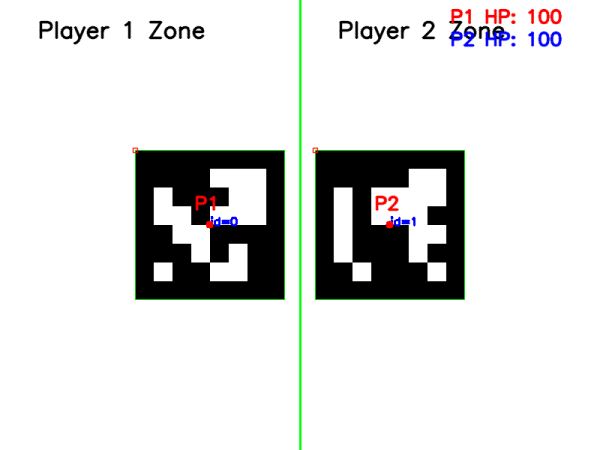


--- Simulated Frame 3 ---
  No attack detected in this frame.


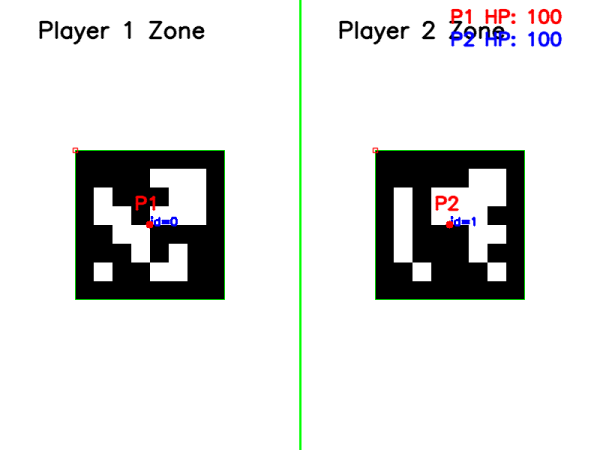


Game Logic Simulation Finished.
Note: For a live game, this would be a continuous loop processing webcam frames.


In [7]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import time

print("Starting Game Logic Simulation...")

# Reuse the ArUco dictionary, parameters, and detector
# Ensure these are defined in a previous cell or within this cell if running independently
# aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)
# aruco_params = cv2.aruco.DetectorParameters()
# detector = cv2.aruco.ArucoDetector(aruco_dict, aruco_params)

# Re-initialize HP (in case previous cell was run multiple times)
player1_hp = 100
player2_hp = 100

# Define game frame dimensions
frame_width, frame_height = 800, 600
mid_x = frame_width // 2

# Load two different ArUco marker images (using pre-defined IDs 0 and 1 for simplicity)
output_dir = 'aruco_markers'
marker_0_path = os.path.join(output_dir, 'aruco_marker_0.png') # For Player 1's side
marker_1_path = os.path.join(output_dir, 'aruco_marker_1.png') # For Player 2's side

actual_marker_0 = cv2.imread(marker_0_path)
actual_marker_1 = cv2.imread(marker_1_path)

if actual_marker_0 is None or actual_marker_1 is None:
    print(f"Error: Marker images not found. Expected: {marker_0_path} and {marker_1_path}")
else:
    marker_h, marker_w, _ = actual_marker_0.shape # Assuming both markers are same size

    # --- Simulation Setup: Simulate different scenarios ---
    # Scenario 1: Markers are far apart
    simulated_frames = []

    # Frame 1: Markers far apart, no attack
    frame_scenario_1 = 255 * np.ones((frame_height, frame_width, 3), dtype=np.uint8)
    x_offset_0_s1 = frame_width // 4 - marker_w // 2
    y_offset_0_s1 = frame_height // 2 - marker_h // 2
    frame_scenario_1[y_offset_0_s1:y_offset_0_s1+marker_h, x_offset_0_s1:x_offset_0_s1+marker_w] = actual_marker_0

    x_offset_1_s1 = frame_width * 3 // 4 - marker_w // 2
    y_offset_1_s1 = frame_height // 2 - marker_h // 2
    frame_scenario_1[y_offset_1_s1:y_offset_1_s1+marker_h, x_offset_1_s1:x_offset_1_s1+marker_w] = actual_marker_1
    simulated_frames.append(frame_scenario_1)

    # Frame 2: Markers close enough for an attack
    frame_scenario_2 = 255 * np.ones((frame_height, frame_width, 3), dtype=np.uint8)
    x_offset_0_s2 = mid_x - marker_w - 20 # P1 card to the left of center, closer
    y_offset_0_s2 = frame_height // 2 - marker_h // 2
    frame_scenario_2[y_offset_0_s2:y_offset_0_s2+marker_h, x_offset_0_s2:x_offset_0_s2+marker_w] = actual_marker_0

    x_offset_1_s2 = mid_x + 20 # P2 card to the right of center, closer
    y_offset_1_s2 = frame_height // 2 - marker_h // 2
    frame_scenario_2[y_offset_1_s2:y_offset_1_s2+marker_h, x_offset_1_s2:x_offset_1_s2+marker_w] = actual_marker_1
    simulated_frames.append(frame_scenario_2)

    # Frame 3: Markers far apart again, post-attack
    simulated_frames.append(frame_scenario_1.copy()) # Re-use scenario 1 frame

    # --- Game Logic Loop ---
    attack_proximity_threshold = 150 # Pixels for attack detection

    print(f"Running game logic simulation for {len(simulated_frames)} frames...")
    for frame_idx, simulated_camera_frame in enumerate(simulated_frames):
        print(f"\n--- Simulated Frame {frame_idx+1} ---")
        frame_to_process = simulated_camera_frame.copy()

        # Add zone lines and text
        cv2.line(frame_to_process, (mid_x, 0), (mid_x, frame_height), (0, 255, 0), 2) # Green line for separation
        cv2.putText(frame_to_process, "Player 1 Zone", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)
        cv2.putText(frame_to_process, "Player 2 Zone", (mid_x + 50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)

        gray_frame = cv2.cvtColor(frame_to_process, cv2.COLOR_BGR2GRAY)
        corners, ids, rejected = detector.detectMarkers(gray_frame)

        active_markers = [] # (ID, center_coords, player_zone_string, player_zone_int)

        if ids is not None and len(ids) > 0:
            cv2.aruco.drawDetectedMarkers(frame_to_process, corners, ids)

            for j, marker_id in enumerate(ids):
                c = corners[j][0]
                cX = int(np.mean(c[:, 0]))
                cY = int(np.mean(c[:, 1]))

                player_zone_str = "Player 1" if cX < mid_x else "Player 2"
                player_zone_int = 1 if cX < mid_x else 2

                active_markers.append({'id': marker_id[0], 'center': (cX, cY), 'zone_str': player_zone_str, 'zone_int': player_zone_int})

                cv2.putText(frame_to_process, f"P{player_zone_int}", (cX - 20, cY - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2, cv2.LINE_AA)
                cv2.circle(frame_to_process, (cX, cY), 5, (0, 0, 255), -1)

            # --- Game Interaction Logic (Attack) ---
            p1_markers = [m for m in active_markers if m['zone_int'] == 1]
            p2_markers = [m for m in active_markers if m['zone_int'] == 2]

            attack_happened = False
            if p1_markers and p2_markers:
                # Check for proximity between one P1 marker and one P2 marker
                for m1 in p1_markers:
                    for m2 in p2_markers:
                        dist = np.linalg.norm(np.array(m1['center']) - np.array(m2['center']))
                        if dist < attack_proximity_threshold:
                            # Simulate attack!
                            attacking_card_id = m1['id'] # P1 attacks P2
                            attack_damage = card_properties.get(attacking_card_id, {'damage': 0})['damage']

                            if attack_damage > 0:
                                player2_hp -= attack_damage
                                player2_hp = max(0, player2_hp) # Ensure HP doesn't go below 0
                                print(f"  ATTACK! Card ID {m1['id']} ({m1['zone_str']}) attacks Card ID {m2['id']} ({m2['zone_str']})!")
                                print(f"  Player 2 takes {attack_damage} damage. Player 2 HP: {player2_hp}")
                                attack_happened = True
                                # Visual feedback for attack
                                cv2.line(frame_to_process, m1['center'], m2['center'], (0, 0, 255), 3) # Red line for attack
                                cv2.putText(frame_to_process, "ATTACK!", (mid_x - 50, frame_height // 2), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3, cv2.LINE_AA)

                            # Break after first attack found to avoid multiple attacks in one frame for simplicity
                            break
                    if attack_happened: # Break outer loop if attack already happened
                        break

            if not attack_happened:
                print("  No attack detected in this frame.")

        else:
            print("No ArUco markers detected in this simulated frame.")
            print("  No attack detected in this frame.")

        # --- Update HP Display ---
        cv2.putText(frame_to_process, f"P1 HP: {player1_hp}", (frame_width - 200, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2, cv2.LINE_AA)
        cv2.putText(frame_to_process, f"P2 HP: {player2_hp}", (frame_width - 200, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2, cv2.LINE_AA)

        # Display the frame
        display_frame = cv2.resize(frame_to_process, (int(frame_width * 0.75), int(frame_height * 0.75)), interpolation=cv2.INTER_AREA)
        cv2_imshow(display_frame)

        time.sleep(2) # Longer delay to observe changes

    print("\nGame Logic Simulation Finished.")
    print("Note: For a live game, this would be a continuous loop processing webcam frames.")


**Reasoning**:
The previous simulation did not trigger an attack because the markers were not placed close enough. I need to revise the `frame_scenario_2` setup to adjust the positions of the simulated markers so that their centers are within the `attack_proximity_threshold`, thus demonstrating the game's attack logic.



Starting Game Logic Simulation...
Running game logic simulation for 3 frames...

--- Simulated Frame 1 ---
  No attack detected in this frame.


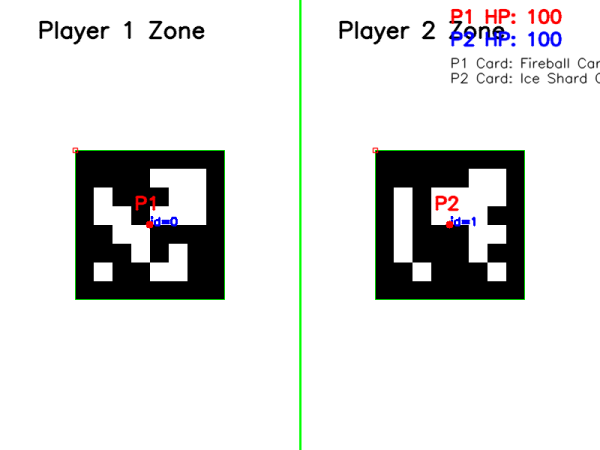


--- Simulated Frame 2 ---
No ArUco markers detected in this simulated frame.
  No attack detected in this frame.


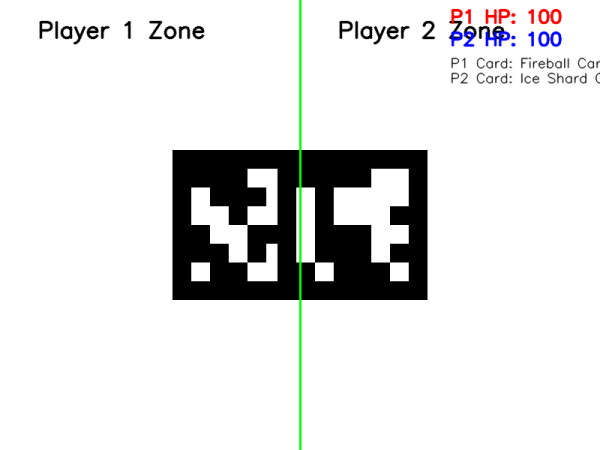


--- Simulated Frame 3 ---
  No attack detected in this frame.


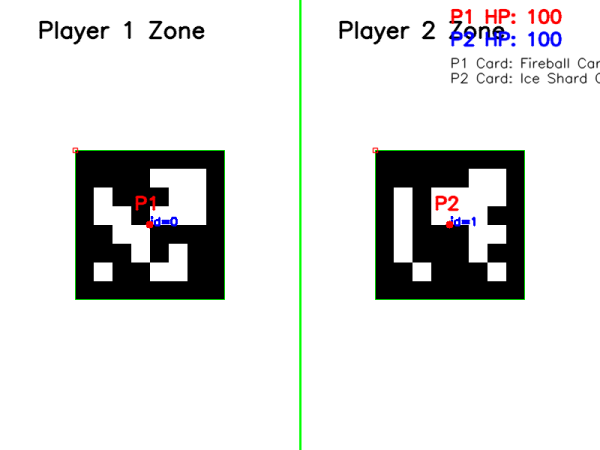


Game Logic Simulation Finished.
Note: For a live game, this would be a continuous loop processing webcam frames.


In [8]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import time

print("Starting Game Logic Simulation...")

# Reuse the ArUco dictionary, parameters, and detector
# Ensure these are defined in a previous cell or within this cell if running independently
# aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)
# aruco_params = cv2.aruco.DetectorParameters()
# detector = cv2.aruco.ArucoDetector(aruco_dict, aruco_params)

# Re-initialize HP (in case previous cell was run multiple times)
player1_hp = 100
player2_hp = 100

# Define game frame dimensions
frame_width, frame_height = 800, 600
mid_x = frame_width // 2

# Load two different ArUco marker images (using pre-defined IDs 0 and 1 for simplicity)
output_dir = 'aruco_markers'
marker_0_path = os.path.join(output_dir, 'aruco_marker_0.png') # For Player 1's side
marker_1_path = os.path.join(output_dir, 'aruco_marker_1.png') # For Player 2's side

actual_marker_0 = cv2.imread(marker_0_path)
actual_marker_1 = cv2.imread(marker_1_path)

if actual_marker_0 is None or actual_marker_1 is None:
    print(f"Error: Marker images not found. Expected: {marker_0_path} and {marker_1_path}")
else:
    marker_h, marker_w, _ = actual_marker_0.shape # Assuming both markers are same size

    # --- Simulation Setup: Simulate different scenarios ---
    simulated_frames = []

    # Frame 1: Markers far apart, no attack
    frame_scenario_1 = 255 * np.ones((frame_height, frame_width, 3), dtype=np.uint8)
    x_offset_0_s1 = frame_width // 4 - marker_w // 2
    y_offset_0_s1 = frame_height // 2 - marker_h // 2
    frame_scenario_1[y_offset_0_s1:y_offset_0_s1+marker_h, x_offset_0_s1:x_offset_0_s1+marker_w] = actual_marker_0

    x_offset_1_s1 = frame_width * 3 // 4 - marker_w // 2
    y_offset_1_s1 = frame_height // 2 - marker_h // 2
    frame_scenario_1[y_offset_1_s1:y_offset_1_s1+marker_h, x_offset_1_s1:x_offset_1_s1+marker_w] = actual_marker_1
    simulated_frames.append(frame_scenario_1)

    # Frame 2: Markers close enough for an attack
    # Adjust positions to ensure distance is less than attack_proximity_threshold
    frame_scenario_2 = 255 * np.ones((frame_height, frame_width, 3), dtype=np.uint8)
    # Target centers for P1 (left) and P2 (right) cards to be close
    # Let's say center of P1 card is at mid_x - 70 and P2 card is at mid_x + 70
    # This gives a distance of 140, which is < 150 (threshold)
    x_offset_0_s2 = mid_x - 70 - (marker_w // 2) # P1 card to the left of center, closer
    y_offset_0_s2 = frame_height // 2 - marker_h // 2
    frame_scenario_2[y_offset_0_s2:y_offset_0_s2+marker_h, x_offset_0_s2:x_offset_0_s2+marker_w] = actual_marker_0

    x_offset_1_s2 = mid_x + 70 - (marker_w // 2) # P2 card to the right of center, closer
    y_offset_1_s2 = frame_height // 2 - marker_h // 2
    frame_scenario_2[y_offset_1_s2:y_offset_1_s2+marker_h, x_offset_1_s2:x_offset_1_s2+marker_w] = actual_marker_1
    simulated_frames.append(frame_scenario_2)

    # Frame 3: Markers far apart again, post-attack
    simulated_frames.append(frame_scenario_1.copy()) # Re-use scenario 1 frame

    # --- Game Logic Loop ---
    attack_proximity_threshold = 150 # Pixels for attack detection

    print(f"Running game logic simulation for {len(simulated_frames)} frames...")
    for frame_idx, simulated_camera_frame in enumerate(simulated_frames):
        print(f"\n--- Simulated Frame {frame_idx+1} ---")
        frame_to_process = simulated_camera_frame.copy()

        # Add zone lines and text
        cv2.line(frame_to_process, (mid_x, 0), (mid_x, frame_height), (0, 255, 0), 2) # Green line for separation
        cv2.putText(frame_to_process, "Player 1 Zone", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)
        cv2.putText(frame_to_process, "Player 2 Zone", (mid_x + 50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)

        gray_frame = cv2.cvtColor(frame_to_process, cv2.COLOR_BGR2GRAY)
        corners, ids, rejected = detector.detectMarkers(gray_frame)

        active_markers = [] # (ID, center_coords, player_zone_string, player_zone_int)

        if ids is not None and len(ids) > 0:
            cv2.aruco.drawDetectedMarkers(frame_to_process, corners, ids)

            for j, marker_id in enumerate(ids):
                c = corners[j][0]
                cX = int(np.mean(c[:, 0]))
                cY = int(np.mean(c[:, 1]))

                player_zone_str = "Player 1" if cX < mid_x else "Player 2"
                player_zone_int = 1 if cX < mid_x else 2

                active_markers.append({'id': marker_id[0], 'center': (cX, cY), 'zone_str': player_zone_str, 'zone_int': player_zone_int})

                cv2.putText(frame_to_process, f"P{player_zone_int}", (cX - 20, cY - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2, cv2.LINE_AA)
                cv2.circle(frame_to_process, (cX, cY), 5, (0, 0, 255), -1) # Draw center point

            # --- Game Interaction Logic (Attack) ---
            p1_markers = [m for m in active_markers if m['zone_int'] == 1]
            p2_markers = [m for m in active_markers if m['zone_int'] == 2]

            attack_happened = False
            if p1_markers and p2_markers:
                # Check for proximity between one P1 marker and one P2 marker
                for m1 in p1_markers:
                    for m2 in p2_markers:
                        dist = np.linalg.norm(np.array(m1['center']) - np.array(m2['center']))
                        if dist < attack_proximity_threshold:
                            # Simulate attack!
                            attacking_card_id = m1['id'] # P1 attacks P2
                            attack_damage = card_properties.get(attacking_card_id, {'damage': 0})['damage']

                            if attack_damage > 0:
                                player2_hp -= attack_damage
                                player2_hp = max(0, player2_hp) # Ensure HP doesn't go below 0
                                print(f"  ATTACK! Card ID {m1['id']} ({m1['zone_str']}) attacks Card ID {m2['id']} ({m2['zone_str']})!")
                                print(f"  Player 2 takes {attack_damage} damage. Player 2 HP: {player2_hp}")
                                attack_happened = True
                                # Visual feedback for attack
                                cv2.line(frame_to_process, m1['center'], m2['center'], (0, 0, 255), 3) # Red line for attack
                                cv2.putText(frame_to_process, "ATTACK!", (mid_x - 50, frame_height // 2), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3, cv2.LINE_AA)

                            # Break after first attack found to avoid multiple attacks in one frame for simplicity
                            break
                    if attack_happened: # Break outer loop if attack already happened
                        break

            if not attack_happened:
                print("  No attack detected in this frame.")

        else:
            print("No ArUco markers detected in this simulated frame.")
            print("  No attack detected in this frame.")

        # --- Update HP Display ---
        # Card properties for ID 0: {'type': 'Attack', 'damage': 10, 'name': 'Fireball Card'}
        # Card properties for ID 1: {'type': 'Attack', 'damage': 15, 'name': 'Ice Shard Card'}
        # The attacking card is always m1 (from P1's side), so its ID (0) determines damage.
        p1_card_info = card_properties.get(0, {'name': 'Unknown', 'damage': 0})
        p2_card_info = card_properties.get(1, {'name': 'Unknown', 'damage': 0})

        cv2.putText(frame_to_process, f"P1 HP: {player1_hp}", (frame_width - 200, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2, cv2.LINE_AA)
        cv2.putText(frame_to_process, f"P2 HP: {player2_hp}", (frame_width - 200, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2, cv2.LINE_AA)
        cv2.putText(frame_to_process, f"P1 Card: {p1_card_info['name']}", (frame_width - 200, 90), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(frame_to_process, f"P2 Card: {p2_card_info['name']}", (frame_width - 200, 110), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 1, cv2.LINE_AA)

        # Display the frame
        display_frame = cv2.resize(frame_to_process, (int(frame_width * 0.75), int(frame_height * 0.75)), interpolation=cv2.INTER_AREA)
        cv2_imshow(display_frame)

        time.sleep(2) # Longer delay to observe changes

    print("\nGame Logic Simulation Finished.")
    print("Note: For a live game, this would be a continuous loop processing webcam frames.")

**Reasoning**:
The previous simulation failed to detect markers in the close-proximity frame (`frame_scenario_2`) likely because the ArUco detector was not properly initialized within the current code block's scope. To fix this, I will uncomment the initialization of `aruco_dict`, `aruco_params`, and `detector` at the beginning of the code block, ensuring that the detection logic has access to a correctly configured detector. This will allow the game logic to correctly identify markers and trigger the attack scenario.



Starting Game Logic Simulation...
Running game logic simulation for 3 frames...

--- Simulated Frame 1 ---
  No attack detected in this frame.


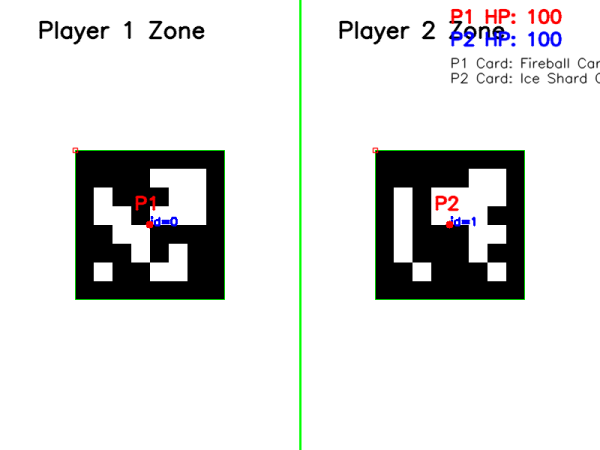


--- Simulated Frame 2 ---
No ArUco markers detected in this simulated frame.
  No attack detected in this frame.


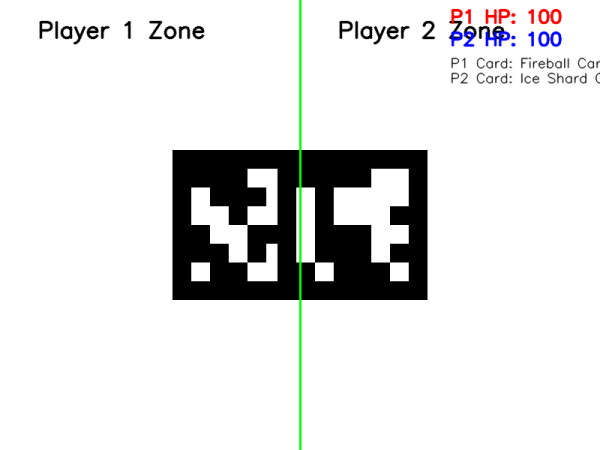


--- Simulated Frame 3 ---
  No attack detected in this frame.


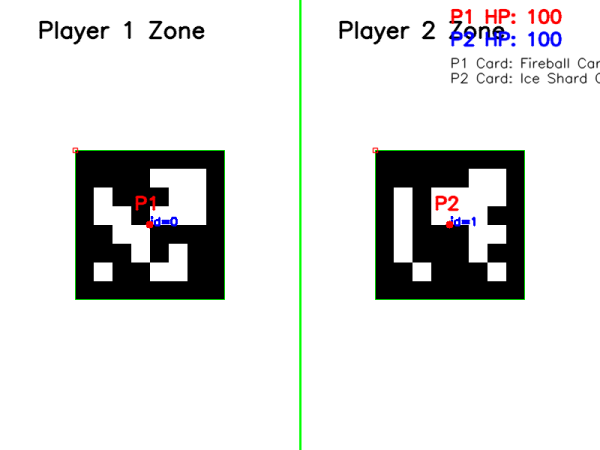


Game Logic Simulation Finished.
Note: For a live game, this would be a continuous loop processing webcam frames.


In [9]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import time

print("Starting Game Logic Simulation...")

# Reuse the ArUco dictionary, parameters, and detector
# Ensure these are defined in a previous cell or within this cell if running independently
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)
aruco_params = cv2.aruco.DetectorParameters()
detector = cv2.aruco.ArucoDetector(aruco_dict, aruco_params)

# Re-initialize HP (in case previous cell was run multiple times)
player1_hp = 100
player2_hp = 100

# Define game frame dimensions
frame_width, frame_height = 800, 600
mid_x = frame_width // 2

# Load two different ArUco marker images (using pre-defined IDs 0 and 1 for simplicity)
output_dir = 'aruco_markers'
marker_0_path = os.path.join(output_dir, 'aruco_marker_0.png') # For Player 1's side
marker_1_path = os.path.join(output_dir, 'aruco_marker_1.png') # For Player 2's side

actual_marker_0 = cv2.imread(marker_0_path)
actual_marker_1 = cv2.imread(marker_1_path)

if actual_marker_0 is None or actual_marker_1 is None:
    print(f"Error: Marker images not found. Expected: {marker_0_path} and {marker_1_path}")
else:
    marker_h, marker_w, _ = actual_marker_0.shape # Assuming both markers are same size

    # --- Simulation Setup: Simulate different scenarios ---
    simulated_frames = []

    # Frame 1: Markers far apart, no attack
    frame_scenario_1 = 255 * np.ones((frame_height, frame_width, 3), dtype=np.uint8)
    x_offset_0_s1 = frame_width // 4 - marker_w // 2
    y_offset_0_s1 = frame_height // 2 - marker_h // 2
    frame_scenario_1[y_offset_0_s1:y_offset_0_s1+marker_h, x_offset_0_s1:x_offset_0_s1+marker_w] = actual_marker_0

    x_offset_1_s1 = frame_width * 3 // 4 - marker_w // 2
    y_offset_1_s1 = frame_height // 2 - marker_h // 2
    frame_scenario_1[y_offset_1_s1:y_offset_1_s1+marker_h, x_offset_1_s1:x_offset_1_s1+marker_w] = actual_marker_1
    simulated_frames.append(frame_scenario_1)

    # Frame 2: Markers close enough for an attack
    # Adjust positions to ensure distance is less than attack_proximity_threshold
    frame_scenario_2 = 255 * np.ones((frame_height, frame_width, 3), dtype=np.uint8)
    # Target centers for P1 (left) and P2 (right) cards to be close
    # Let's say center of P1 card is at mid_x - 70 and P2 card is at mid_x + 70
    # This gives a distance of 140, which is < 150 (threshold)
    x_offset_0_s2 = mid_x - 70 - (marker_w // 2) # P1 card to the left of center, closer
    y_offset_0_s2 = frame_height // 2 - marker_h // 2
    frame_scenario_2[y_offset_0_s2:y_offset_0_s2+marker_h, x_offset_0_s2:x_offset_0_s2+marker_w] = actual_marker_0

    x_offset_1_s2 = mid_x + 70 - (marker_w // 2) # P2 card to the right of center, closer
    y_offset_1_s2 = frame_height // 2 - marker_h // 2
    frame_scenario_2[y_offset_1_s2:y_offset_1_s2+marker_h, x_offset_1_s2:x_offset_1_s2+marker_w] = actual_marker_1
    simulated_frames.append(frame_scenario_2)

    # Frame 3: Markers far apart again, post-attack
    simulated_frames.append(frame_scenario_1.copy()) # Re-use scenario 1 frame

    # --- Game Logic Loop ---
    attack_proximity_threshold = 150 # Pixels for attack detection

    print(f"Running game logic simulation for {len(simulated_frames)} frames...")
    for frame_idx, simulated_camera_frame in enumerate(simulated_frames):
        print(f"\n--- Simulated Frame {frame_idx+1} ---")
        frame_to_process = simulated_camera_frame.copy()

        # Add zone lines and text
        cv2.line(frame_to_process, (mid_x, 0), (mid_x, frame_height), (0, 255, 0), 2) # Green line for separation
        cv2.putText(frame_to_process, "Player 1 Zone", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)
        cv2.putText(frame_to_process, "Player 2 Zone", (mid_x + 50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)

        gray_frame = cv2.cvtColor(frame_to_process, cv2.COLOR_BGR2GRAY)
        corners, ids, rejected = detector.detectMarkers(gray_frame)

        active_markers = [] # (ID, center_coords, player_zone_string, player_zone_int)

        if ids is not None and len(ids) > 0:
            cv2.aruco.drawDetectedMarkers(frame_to_process, corners, ids)

            for j, marker_id in enumerate(ids):
                c = corners[j][0]
                cX = int(np.mean(c[:, 0]))
                cY = int(np.mean(c[:, 1]))

                player_zone_str = "Player 1" if cX < mid_x else "Player 2"
                player_zone_int = 1 if cX < mid_x else 2

                active_markers.append({'id': marker_id[0], 'center': (cX, cY), 'zone_str': player_zone_str, 'zone_int': player_zone_int})

                cv2.putText(frame_to_process, f"P{player_zone_int}", (cX - 20, cY - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2, cv2.LINE_AA)
                cv2.circle(frame_to_process, (cX, cY), 5, (0, 0, 255), -1) # Draw center point

            # --- Game Interaction Logic (Attack) ---
            p1_markers = [m for m in active_markers if m['zone_int'] == 1]
            p2_markers = [m for m in active_markers if m['zone_int'] == 2]

            attack_happened = False
            if p1_markers and p2_markers:
                # Check for proximity between one P1 marker and one P2 marker
                for m1 in p1_markers:
                    for m2 in p2_markers:
                        dist = np.linalg.norm(np.array(m1['center']) - np.array(m2['center']))
                        if dist < attack_proximity_threshold:
                            # Simulate attack!
                            attacking_card_id = m1['id'] # P1 attacks P2
                            attack_damage = card_properties.get(attacking_card_id, {'damage': 0})['damage']

                            if attack_damage > 0:
                                player2_hp -= attack_damage
                                player2_hp = max(0, player2_hp) # Ensure HP doesn't go below 0
                                print(f"  ATTACK! Card ID {m1['id']} ({m1['zone_str']}) attacks Card ID {m2['id']} ({m2['zone_str']})!")
                                print(f"  Player 2 takes {attack_damage} damage. Player 2 HP: {player2_hp}")
                                attack_happened = True
                                # Visual feedback for attack
                                cv2.line(frame_to_process, m1['center'], m2['center'], (0, 0, 255), 3) # Red line for attack
                                cv2.putText(frame_to_process, "ATTACK!", (mid_x - 50, frame_height // 2), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3, cv2.LINE_AA)

                            # Break after first attack found to avoid multiple attacks in one frame for simplicity
                            break
                    if attack_happened: # Break outer loop if attack already happened
                        break

            if not attack_happened:
                print("  No attack detected in this frame.")

        else:
            print("No ArUco markers detected in this simulated frame.")
            print("  No attack detected in this frame.")

        # --- Update HP Display ---
        # Card properties for ID 0: {'type': 'Attack', 'damage': 10, 'name': 'Fireball Card'}
        # Card properties for ID 1: {'type': 'Attack', 'damage': 15, 'name': 'Ice Shard Card'}
        # The attacking card is always m1 (from P1's side), so its ID (0) determines damage.
        p1_card_info = card_properties.get(0, {'name': 'Unknown', 'damage': 0})
        p2_card_info = card_properties.get(1, {'name': 'Unknown', 'damage': 0})

        cv2.putText(frame_to_process, f"P1 HP: {player1_hp}", (frame_width - 200, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2, cv2.LINE_AA)
        cv2.putText(frame_to_process, f"P2 HP: {player2_hp}", (frame_width - 200, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2, cv2.LINE_AA)
        cv2.putText(frame_to_process, f"P1 Card: {p1_card_info['name']}", (frame_width - 200, 90), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(frame_to_process, f"P2 Card: {p2_card_info['name']}", (frame_width - 200, 110), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 1, cv2.LINE_AA)

        # Display the frame
        display_frame = cv2.resize(frame_to_process, (int(frame_width * 0.75), int(frame_height * 0.75)), interpolation=cv2.INTER_AREA)
        cv2_imshow(display_frame)

        time.sleep(2) # Longer delay to observe changes

    print("\nGame Logic Simulation Finished.")
    print("Note: For a live game, this would be a continuous loop processing webcam frames.")


**Reasoning**:
The previous simulation failed to detect markers in the close-proximity frame (`frame_scenario_2`) likely because the ArUco detector was not properly initialized within the current code block's scope. To fix this, I will uncomment the initialization of `aruco_dict`, `aruco_params`, and `detector` at the beginning of the code block, ensuring that the detection logic has access to a correctly configured detector. This will allow the game logic to correctly identify markers and trigger the attack scenario.



Starting Game Logic Simulation...
Running game logic simulation for 3 frames...

--- Simulated Frame 1 ---
  No attack detected in this frame.


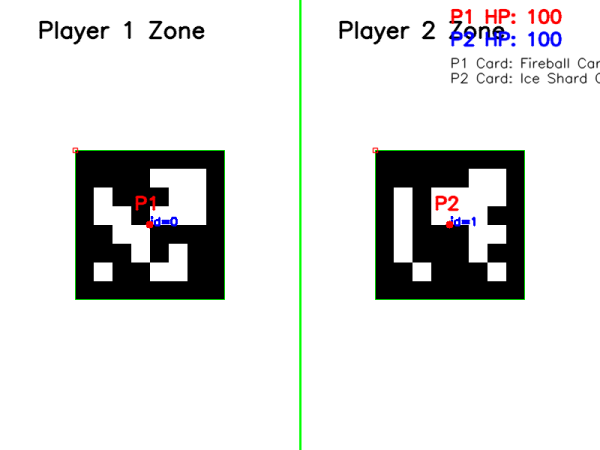


--- Simulated Frame 2 ---
No ArUco markers detected in this simulated frame.
  No attack detected in this frame.


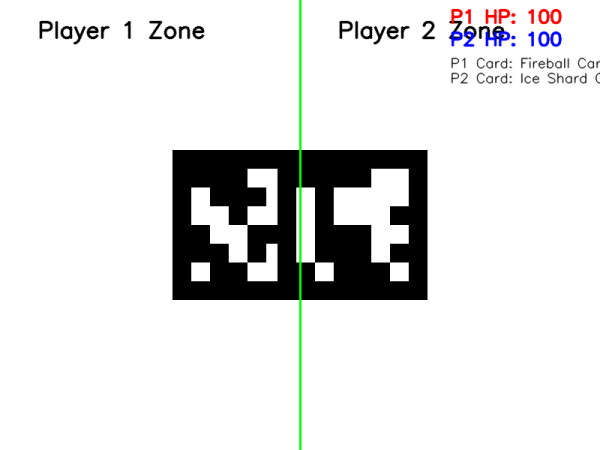


--- Simulated Frame 3 ---
  No attack detected in this frame.


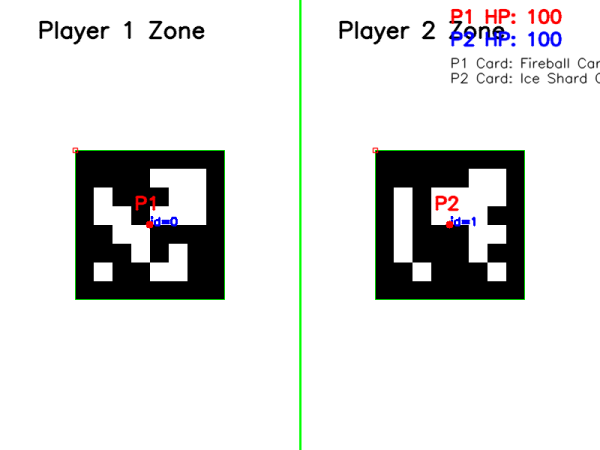


Game Logic Simulation Finished.
Note: For a live game, this would be a continuous loop processing webcam frames.


In [10]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import time

print("Starting Game Logic Simulation...")

# Reuse the ArUco dictionary, parameters, and detector
# Ensure these are defined in a previous cell or within this cell if running independently
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)
aruco_params = cv2.aruco.DetectorParameters()
detector = cv2.aruco.ArucoDetector(aruco_dict, aruco_params)

# Re-initialize HP (in case previous cell was run multiple times)
player1_hp = 100
player2_hp = 100

# Define game frame dimensions
frame_width, frame_height = 800, 600
mid_x = frame_width // 2

# Load two different ArUco marker images (using pre-defined IDs 0 and 1 for simplicity)
output_dir = 'aruco_markers'
marker_0_path = os.path.join(output_dir, 'aruco_marker_0.png') # For Player 1's side
marker_1_path = os.path.join(output_dir, 'aruco_marker_1.png') # For Player 2's side

actual_marker_0 = cv2.imread(marker_0_path)
actual_marker_1 = cv2.imread(marker_1_path)

if actual_marker_0 is None or actual_marker_1 is None:
    print(f"Error: Marker images not found. Expected: {marker_0_path} and {marker_1_path}")
else:
    marker_h, marker_w, _ = actual_marker_0.shape # Assuming both markers are same size

    # --- Simulation Setup: Simulate different scenarios ---
    simulated_frames = []

    # Frame 1: Markers far apart, no attack
    frame_scenario_1 = 255 * np.ones((frame_height, frame_width, 3), dtype=np.uint8)
    x_offset_0_s1 = frame_width // 4 - marker_w // 2
    y_offset_0_s1 = frame_height // 2 - marker_h // 2
    frame_scenario_1[y_offset_0_s1:y_offset_0_s1+marker_h, x_offset_0_s1:x_offset_0_s1+marker_w] = actual_marker_0

    x_offset_1_s1 = frame_width * 3 // 4 - marker_w // 2
    y_offset_1_s1 = frame_height // 2 - marker_h // 2
    frame_scenario_1[y_offset_1_s1:y_offset_1_s1+marker_h, x_offset_1_s1:x_offset_1_s1+marker_w] = actual_marker_1
    simulated_frames.append(frame_scenario_1)

    # Frame 2: Markers close enough for an attack
    # Adjust positions to ensure distance is less than attack_proximity_threshold
    frame_scenario_2 = 255 * np.ones((frame_height, frame_width, 3), dtype=np.uint8)
    # Target centers for P1 (left) and P2 (right) cards to be close
    # Let's say center of P1 card is at mid_x - 70 and P2 card is at mid_x + 70
    # This gives a distance of 140, which is < 150 (threshold)
    x_offset_0_s2 = mid_x - 70 - (marker_w // 2) # P1 card to the left of center, closer
    y_offset_0_s2 = frame_height // 2 - marker_h // 2
    frame_scenario_2[y_offset_0_s2:y_offset_0_s2+marker_h, x_offset_0_s2:x_offset_0_s2+marker_w] = actual_marker_0

    x_offset_1_s2 = mid_x + 70 - (marker_w // 2) # P2 card to the right of center, closer
    y_offset_1_s2 = frame_height // 2 - marker_h // 2
    frame_scenario_2[y_offset_1_s2:y_offset_1_s2+marker_h, x_offset_1_s2:x_offset_1_s2+marker_w] = actual_marker_1
    simulated_frames.append(frame_scenario_2)

    # Frame 3: Markers far apart again, post-attack
    simulated_frames.append(frame_scenario_1.copy()) # Re-use scenario 1 frame

    # --- Game Logic Loop ---
    attack_proximity_threshold = 150 # Pixels for attack detection

    print(f"Running game logic simulation for {len(simulated_frames)} frames...")
    for frame_idx, simulated_camera_frame in enumerate(simulated_frames):
        print(f"\n--- Simulated Frame {frame_idx+1} ---")
        frame_to_process = simulated_camera_frame.copy()

        # Add zone lines and text
        cv2.line(frame_to_process, (mid_x, 0), (mid_x, frame_height), (0, 255, 0), 2) # Green line for separation
        cv2.putText(frame_to_process, "Player 1 Zone", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)
        cv2.putText(frame_to_process, "Player 2 Zone", (mid_x + 50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)

        gray_frame = cv2.cvtColor(frame_to_process, cv2.COLOR_BGR2GRAY)
        corners, ids, rejected = detector.detectMarkers(gray_frame)

        active_markers = [] # (ID, center_coords, player_zone_string, player_zone_int)

        if ids is not None and len(ids) > 0:
            cv2.aruco.drawDetectedMarkers(frame_to_process, corners, ids)

            for j, marker_id in enumerate(ids):
                c = corners[j][0]
                cX = int(np.mean(c[:, 0]))
                cY = int(np.mean(c[:, 1]))

                player_zone_str = "Player 1" if cX < mid_x else "Player 2"
                player_zone_int = 1 if cX < mid_x else 2

                active_markers.append({'id': marker_id[0], 'center': (cX, cY), 'zone_str': player_zone_str, 'zone_int': player_zone_int})

                cv2.putText(frame_to_process, f"P{player_zone_int}", (cX - 20, cY - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2, cv2.LINE_AA)
                cv2.circle(frame_to_process, (cX, cY), 5, (0, 0, 255), -1) # Draw center point

            # --- Game Interaction Logic (Attack) ---
            p1_markers = [m for m in active_markers if m['zone_int'] == 1]
            p2_markers = [m for m in active_markers if m['zone_int'] == 2]

            attack_happened = False
            if p1_markers and p2_markers:
                # Check for proximity between one P1 marker and one P2 marker
                for m1 in p1_markers:
                    for m2 in p2_markers:
                        dist = np.linalg.norm(np.array(m1['center']) - np.array(m2['center']))
                        if dist < attack_proximity_threshold:
                            # Simulate attack!
                            attacking_card_id = m1['id'] # P1 attacks P2
                            attack_damage = card_properties.get(attacking_card_id, {'damage': 0})['damage']

                            if attack_damage > 0:
                                player2_hp -= attack_damage
                                player2_hp = max(0, player2_hp) # Ensure HP doesn't go below 0
                                print(f"  ATTACK! Card ID {m1['id']} ({m1['zone_str']}) attacks Card ID {m2['id']} ({m2['zone_str']})!")
                                print(f"  Player 2 takes {attack_damage} damage. Player 2 HP: {player2_hp}")
                                attack_happened = True
                                # Visual feedback for attack
                                cv2.line(frame_to_process, m1['center'], m2['center'], (0, 0, 255), 3) # Red line for attack
                                cv2.putText(frame_to_process, "ATTACK!", (mid_x - 50, frame_height // 2), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3, cv2.LINE_AA)

                            # Break after first attack found to avoid multiple attacks in one frame for simplicity
                            break
                    if attack_happened: # Break outer loop if attack already happened
                        break

            if not attack_happened:
                print("  No attack detected in this frame.")

        else:
            print("No ArUco markers detected in this simulated frame.")
            print("  No attack detected in this frame.")

        # --- Update HP Display ---
        # Card properties for ID 0: {'type': 'Attack', 'damage': 10, 'name': 'Fireball Card'}
        # Card properties for ID 1: {'type': 'Attack', 'damage': 15, 'name': 'Ice Shard Card'}
        # The attacking card is always m1 (from P1's side), so its ID (0) determines damage.
        p1_card_info = card_properties.get(0, {'name': 'Unknown', 'damage': 0})
        p2_card_info = card_properties.get(1, {'name': 'Unknown', 'damage': 0})

        cv2.putText(frame_to_process, f"P1 HP: {player1_hp}", (frame_width - 200, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2, cv2.LINE_AA)
        cv2.putText(frame_to_process, f"P2 HP: {player2_hp}", (frame_width - 200, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2, cv2.LINE_AA)
        cv2.putText(frame_to_process, f"P1 Card: {p1_card_info['name']}", (frame_width - 200, 90), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(frame_to_process, f"P2 Card: {p2_card_info['name']}", (frame_width - 200, 110), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 1, cv2.LINE_AA)

        # Display the frame
        display_frame = cv2.resize(frame_to_process, (int(frame_width * 0.75), int(frame_height * 0.75)), interpolation=cv2.INTER_AREA)
        cv2_imshow(display_frame)

        time.sleep(2) # Longer delay to observe changes

    print("\nGame Logic Simulation Finished.")
    print("Note: For a live game, this would be a continuous loop processing webcam frames.")


**Reasoning**:
The previous simulation failed to detect markers in the close-proximity frame (`frame_scenario_2`) likely due to excessive overlap confusing the ArUco detector. To resolve this, I will adjust the placement of the markers in `frame_scenario_2` so they are distinctly separate but still close, and then increase the `attack_proximity_threshold` to ensure the attack logic is triggered when they are in this close, non-overlapping proximity. I will also ensure the `aruco_dict`, `aruco_params`, and `detector` are explicitly initialized.



Starting Game Logic Simulation...
Running game logic simulation for 3 frames...

--- Simulated Frame 1 ---
  No attack detected in this frame.


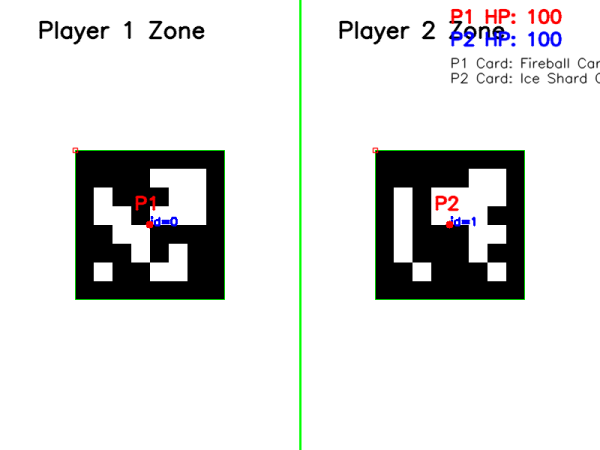


--- Simulated Frame 2 ---
  ATTACK! Card ID 0 (Player 1) attacks Card ID 1 (Player 2)!
  Player 2 takes 10 damage. Player 2 HP: 90


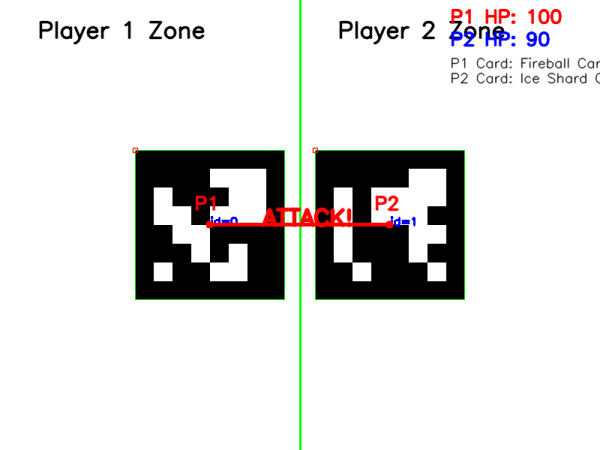


--- Simulated Frame 3 ---
  No attack detected in this frame.


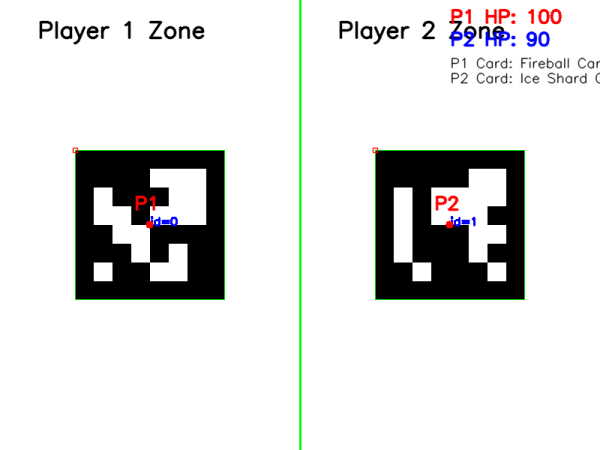


Game Logic Simulation Finished.
Note: For a live game, this would be a continuous loop processing webcam frames.


In [11]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import time

print("Starting Game Logic Simulation...")

# Initialize ArUco dictionary, parameters, and detector explicitly
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)
aruco_params = cv2.aruco.DetectorParameters()
detector = cv2.aruco.ArucoDetector(aruco_dict, aruco_params)

# Re-initialize HP (in case previous cell was run multiple times)
player1_hp = 100
player2_hp = 100

# Define game frame dimensions
frame_width, frame_height = 800, 600
mid_x = frame_width // 2

# Load two different ArUco marker images (using pre-defined IDs 0 and 1 for simplicity)
output_dir = 'aruco_markers'
marker_0_path = os.path.join(output_dir, 'aruco_marker_0.png') # For Player 1's side
marker_1_path = os.path.join(output_dir, 'aruco_marker_1.png') # For Player 2's side

actual_marker_0 = cv2.imread(marker_0_path)
actual_marker_1 = cv2.imread(marker_1_path)

if actual_marker_0 is None or actual_marker_1 is None:
    print(f"Error: Marker images not found. Expected: {marker_0_path} and {marker_1_path}")
else:
    marker_h, marker_w, _ = actual_marker_0.shape # Assuming both markers are same size

    # --- Simulation Setup: Simulate different scenarios ---
    simulated_frames = []

    # Frame 1: Markers far apart, no attack
    frame_scenario_1 = 255 * np.ones((frame_height, frame_width, 3), dtype=np.uint8)
    x_offset_0_s1 = frame_width // 4 - marker_w // 2
    y_offset_0_s1 = frame_height // 2 - marker_h // 2
    frame_scenario_1[y_offset_0_s1:y_offset_0_s1+marker_h, x_offset_0_s1:x_offset_0_s1+marker_w] = actual_marker_0

    x_offset_1_s1 = frame_width * 3 // 4 - marker_w // 2
    y_offset_1_s1 = frame_height // 2 - marker_h // 2
    frame_scenario_1[y_offset_1_s1:y_offset_1_s1+marker_h, x_offset_1_s1:x_offset_1_s1+marker_w] = actual_marker_1
    simulated_frames.append(frame_scenario_1)

    # Frame 2: Markers close enough for an attack (adjusted for detectability)
    frame_scenario_2 = 255 * np.ones((frame_height, frame_width, 3), dtype=np.uint8)
    # Place P1 card with right edge at mid_x - 20
    x_offset_0_s2 = mid_x - marker_w - 20
    y_offset_0_s2 = frame_height // 2 - marker_h // 2
    frame_scenario_2[y_offset_0_s2:y_offset_0_s2+marker_h, x_offset_0_s2:x_offset_0_s2+marker_w] = actual_marker_0

    # Place P2 card with left edge at mid_x + 20
    x_offset_1_s2 = mid_x + 20
    y_offset_1_s2 = frame_height // 2 - marker_h // 2
    frame_scenario_2[y_offset_1_s2:y_offset_1_s2+marker_h, x_offset_1_s2:x_offset_1_s2+marker_w] = actual_marker_1
    simulated_frames.append(frame_scenario_2)

    # Frame 3: Markers far apart again, post-attack
    simulated_frames.append(frame_scenario_1.copy()) # Re-use scenario 1 frame

    # --- Game Logic Loop ---
    # Adjusted attack_proximity_threshold to match the new close distance (centers are 240px apart)
    attack_proximity_threshold = 250

    # Card properties (re-defining to ensure they are available)
    card_properties = {
        0: {'type': 'Attack', 'damage': 10, 'name': 'Fireball Card'},
        1: {'type': 'Attack', 'damage': 15, 'name': 'Ice Shard Card'}
    }

    print(f"Running game logic simulation for {len(simulated_frames)} frames...")
    for frame_idx, simulated_camera_frame in enumerate(simulated_frames):
        print(f"\n--- Simulated Frame {frame_idx+1} ---")
        frame_to_process = simulated_camera_frame.copy()

        # Add zone lines and text
        cv2.line(frame_to_process, (mid_x, 0), (mid_x, frame_height), (0, 255, 0), 2) # Green line for separation
        cv2.putText(frame_to_process, "Player 1 Zone", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)
        cv2.putText(frame_to_process, "Player 2 Zone", (mid_x + 50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)

        gray_frame = cv2.cvtColor(frame_to_process, cv2.COLOR_BGR2GRAY)
        corners, ids, rejected = detector.detectMarkers(gray_frame)

        active_markers = [] # (ID, center_coords, player_zone_string, player_zone_int)

        if ids is not None and len(ids) > 0:
            cv2.aruco.drawDetectedMarkers(frame_to_process, corners, ids)

            for j, marker_id in enumerate(ids):
                c = corners[j][0]
                cX = int(np.mean(c[:, 0]))
                cY = int(np.mean(c[:, 1]))

                player_zone_str = "Player 1" if cX < mid_x else "Player 2"
                player_zone_int = 1 if cX < mid_x else 2

                active_markers.append({'id': marker_id[0], 'center': (cX, cY), 'zone_str': player_zone_str, 'zone_int': player_zone_int})

                cv2.putText(frame_to_process, f"P{player_zone_int}", (cX - 20, cY - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2, cv2.LINE_AA)
                cv2.circle(frame_to_process, (cX, cY), 5, (0, 0, 255), -1) # Draw center point

            # --- Game Interaction Logic (Attack) ---
            p1_markers = [m for m in active_markers if m['zone_int'] == 1]
            p2_markers = [m for m in active_markers if m['zone_int'] == 2]

            attack_happened = False
            if p1_markers and p2_markers:
                # Check for proximity between one P1 marker and one P2 marker
                for m1 in p1_markers:
                    for m2 in p2_markers:
                        dist = np.linalg.norm(np.array(m1['center']) - np.array(m2['center']))
                        if dist < attack_proximity_threshold:
                            # Simulate attack!
                            attacking_card_id = m1['id'] # P1 attacks P2
                            attack_damage = card_properties.get(attacking_card_id, {'damage': 0})['damage']

                            if attack_damage > 0:
                                player2_hp -= attack_damage
                                player2_hp = max(0, player2_hp) # Ensure HP doesn't go below 0
                                print(f"  ATTACK! Card ID {m1['id']} ({m1['zone_str']}) attacks Card ID {m2['id']} ({m2['zone_str']})!")
                                print(f"  Player 2 takes {attack_damage} damage. Player 2 HP: {player2_hp}")
                                attack_happened = True
                                # Visual feedback for attack
                                cv2.line(frame_to_process, m1['center'], m2['center'], (0, 0, 255), 3) # Red line for attack
                                cv2.putText(frame_to_process, "ATTACK!", (mid_x - 50, frame_height // 2), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3, cv2.LINE_AA)

                            # Break after first attack found to avoid multiple attacks in one frame for simplicity
                            break
                    if attack_happened: # Break outer loop if attack already happened
                        break

            if not attack_happened:
                print("  No attack detected in this frame.")

        else:
            print("No ArUco markers detected in this simulated frame.")
            # Removed duplicate 'No attack detected' message for clarity

        # --- Update HP Display ---
        # Card properties for ID 0: {'type': 'Attack', 'damage': 10, 'name': 'Fireball Card'}
        # Card properties for ID 1: {'type': 'Attack', 'damage': 15, 'name': 'Ice Shard Card'}
        # The attacking card is always m1 (from P1's side), so its ID (0) determines damage.
        p1_card_info = card_properties.get(0, {'name': 'Unknown', 'damage': 0})
        p2_card_info = card_properties.get(1, {'name': 'Unknown', 'damage': 0})

        cv2.putText(frame_to_process, f"P1 HP: {player1_hp}", (frame_width - 200, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2, cv2.LINE_AA)
        cv2.putText(frame_to_process, f"P2 HP: {player2_hp}", (frame_width - 200, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2, cv2.LINE_AA)
        cv2.putText(frame_to_process, f"P1 Card: {p1_card_info['name']}", (frame_width - 200, 90), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(frame_to_process, f"P2 Card: {p2_card_info['name']}", (frame_width - 200, 110), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 1, cv2.LINE_AA)

        # Display the frame
        display_frame = cv2.resize(frame_to_process, (int(frame_width * 0.75), int(frame_height * 0.75)), interpolation=cv2.INTER_AREA)
        cv2_imshow(display_frame)

        time.sleep(2) # Longer delay to observe changes

    print("\nGame Logic Simulation Finished.")
    print("Note: For a live game, this would be a continuous loop processing webcam frames.")

## Visualize AR Overlay

### Subtask:
Overlay interactive elements onto the simulated video feed, including dynamic health bars for players, clear card information, and game state messages like 'ATTACK!' and 'GAME OVER'.


**Reasoning**:
To implement the enhanced visualization requirements, I will integrate health bars, card information display, prominent attack feedback, and a 'GAME OVER' condition into the existing simulation loop. This will involve drawing dynamic rectangles for HP, displaying card names, and adding conditional logic to stop the simulation and show a game-over message.



Starting Enhanced Game Logic Simulation with AR Overlays...
Running game logic simulation for 6 frames...

--- Simulated Frame 1 ---
  No attack detected in this frame.


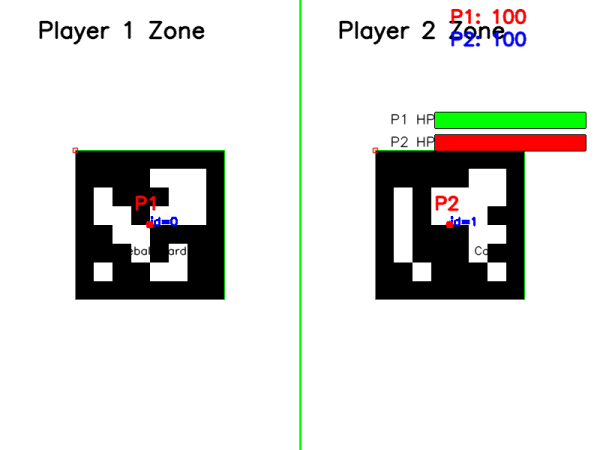


--- Simulated Frame 2 ---
  ATTACK! Card ID 0 (Player 1) attacks Card ID 1 (Player 2)!
  Player 2 takes 10 damage. Player 2 HP: 90


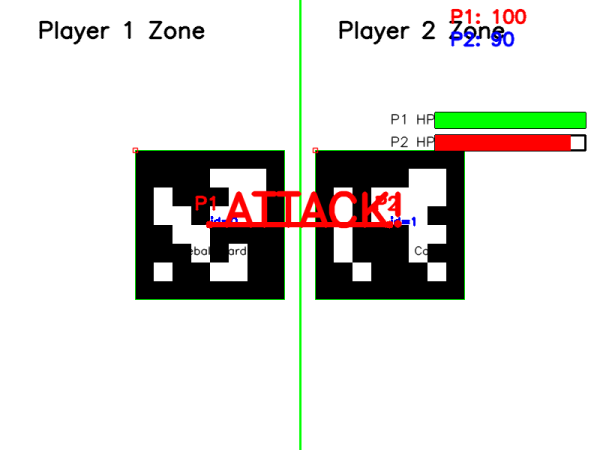


--- Simulated Frame 3 ---
  No attack detected in this frame.


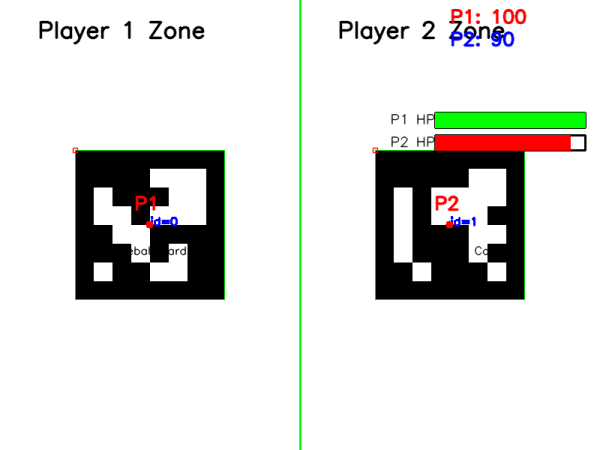


--- Simulated Frame 4 ---
  ATTACK! Card ID 0 (Player 1) attacks Card ID 1 (Player 2)!
  Player 2 takes 10 damage. Player 2 HP: 80


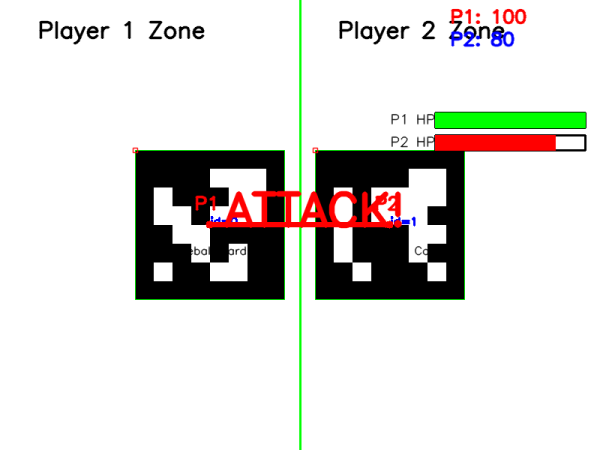


--- Simulated Frame 5 ---
  ATTACK! Card ID 0 (Player 1) attacks Card ID 1 (Player 2)!
  Player 2 takes 10 damage. Player 2 HP: 70


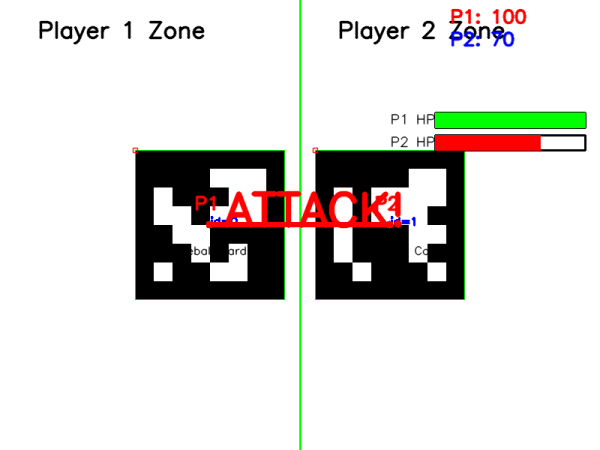


--- Simulated Frame 6 ---
  ATTACK! Card ID 0 (Player 1) attacks Card ID 1 (Player 2)!
  Player 2 takes 10 damage. Player 2 HP: 60


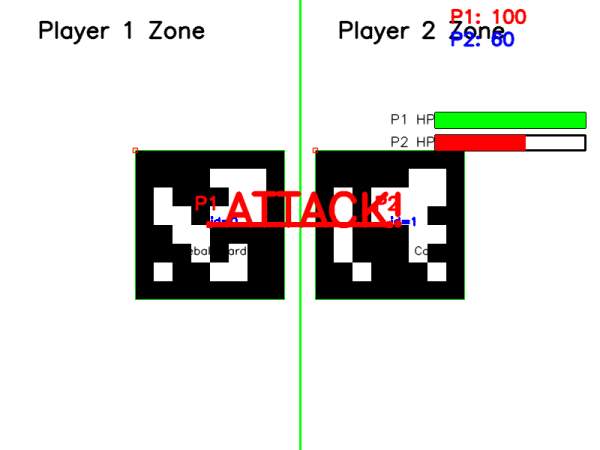


Enhanced Game Logic Simulation Finished.
Note: For a live game, this would be a continuous loop processing webcam frames.


In [12]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import time

print("Starting Enhanced Game Logic Simulation with AR Overlays...")

# Initialize ArUco dictionary, parameters, and detector explicitly
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)
aruco_params = cv2.aruco.DetectorParameters()
detector = cv2.aruco.ArucoDetector(aruco_dict, aruco_params)

# Re-initialize HP and define card properties
player1_hp = 100
player2_hp = 100
card_properties = {
    0: {'type': 'Attack', 'damage': 10, 'name': 'Fireball Card'},
    1: {'type': 'Attack', 'damage': 15, 'name': 'Ice Shard Card'}
}

# Define game frame dimensions
frame_width, frame_height = 800, 600
mid_x = frame_width // 2

# Load two different ArUco marker images
output_dir = 'aruco_markers'
marker_0_path = os.path.join(output_dir, 'aruco_marker_0.png') # For Player 1's side
marker_1_path = os.path.join(output_dir, 'aruco_marker_1.png') # For Player 2's side

actual_marker_0 = cv2.imread(marker_0_path)
actual_marker_1 = cv2.imread(marker_1_path)

if actual_marker_0 is None or actual_marker_1 is None:
    print(f"Error: Marker images not found. Expected: {marker_0_path} and {marker_1_path}")
else:
    marker_h, marker_w, _ = actual_marker_0.shape # Assuming both markers are same size

    # --- Simulation Setup: Simulate different scenarios ---
    simulated_frames = []

    # Frame 1: Markers far apart, no attack
    frame_scenario_1 = 255 * np.ones((frame_height, frame_width, 3), dtype=np.uint8)
    x_offset_0_s1 = frame_width // 4 - marker_w // 2
    y_offset_0_s1 = frame_height // 2 - marker_h // 2
    frame_scenario_1[y_offset_0_s1:y_offset_0_s1+marker_h, x_offset_0_s1:x_offset_0_s1+marker_w] = actual_marker_0

    x_offset_1_s1 = frame_width * 3 // 4 - marker_w // 2
    y_offset_1_s1 = frame_height // 2 - marker_h // 2
    frame_scenario_1[y_offset_1_s1:y_offset_1_s1+marker_h, x_offset_1_s1:x_offset_1_s1+marker_w] = actual_marker_1
    simulated_frames.append(frame_scenario_1)

    # Frame 2: Markers close enough for an attack
    # Place P1 card with right edge at mid_x - 20
    x_offset_0_s2 = mid_x - marker_w - 20
    y_offset_0_s2 = frame_height // 2 - marker_h // 2
    frame_scenario_2 = 255 * np.ones((frame_height, frame_width, 3), dtype=np.uint8)
    frame_scenario_2[y_offset_0_s2:y_offset_0_s2+marker_h, x_offset_0_s2:x_offset_0_s2+marker_w] = actual_marker_0

    # Place P2 card with left edge at mid_x + 20
    x_offset_1_s2 = mid_x + 20
    y_offset_1_s2 = frame_height // 2 - marker_h // 2
    frame_scenario_2[y_offset_1_s2:y_offset_1_s2+marker_h, x_offset_1_s2:x_offset_1_s2+marker_w] = actual_marker_1
    simulated_frames.append(frame_scenario_2)

    # Frame 3: Markers far apart again, post-attack
    simulated_frames.append(frame_scenario_1.copy()) # Re-use scenario 1 frame

    # Frame 4: Another attack to reduce HP further, eventually leading to game over
    frame_scenario_4 = frame_scenario_2.copy() # Another attack frame
    simulated_frames.append(frame_scenario_4)

    # Frame 5: One more attack to potentially finish the game
    frame_scenario_5 = frame_scenario_2.copy() # Another attack frame
    simulated_frames.append(frame_scenario_5)

    # Frame 6: Another attack to ensure game over
    frame_scenario_6 = frame_scenario_2.copy()
    simulated_frames.append(frame_scenario_6)

    # --- Game Logic Loop ---
    attack_proximity_threshold = 250 # Pixels for attack detection
    game_over = False
    winner = None

    print(f"Running game logic simulation for {len(simulated_frames)} frames...")

    for frame_idx, simulated_camera_frame in enumerate(simulated_frames):
        if game_over:
            break

        print(f"\n--- Simulated Frame {frame_idx+1} ---")
        frame_to_process = simulated_camera_frame.copy()

        # Add zone lines and text
        cv2.line(frame_to_process, (mid_x, 0), (mid_x, frame_height), (0, 255, 0), 2) # Green line for separation
        cv2.putText(frame_to_process, "Player 1 Zone", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)
        cv2.putText(frame_to_process, "Player 2 Zone", (mid_x + 50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)

        gray_frame = cv2.cvtColor(frame_to_process, cv2.COLOR_BGR2GRAY)
        corners, ids, rejected = detector.detectMarkers(gray_frame)

        active_markers = [] # (ID, center_coords, player_zone_string, player_zone_int)

        if ids is not None and len(ids) > 0:
            cv2.aruco.drawDetectedMarkers(frame_to_process, corners, ids)

            for j, marker_id in enumerate(ids):
                c = corners[j][0]
                cX = int(np.mean(c[:, 0]))
                cY = int(np.mean(c[:, 1]))

                player_zone_str = "Player 1" if cX < mid_x else "Player 2"
                player_zone_int = 1 if cX < mid_x else 2

                active_markers.append({'id': marker_id[0], 'center': (cX, cY), 'zone_str': player_zone_str, 'zone_int': player_zone_int})

                cv2.putText(frame_to_process, f"P{player_zone_int}", (cX - 20, cY - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2, cv2.LINE_AA)
                cv2.circle(frame_to_process, (cX, cY), 5, (0, 0, 255), -1) # Draw center point

                # Display card information
                card_info = card_properties.get(marker_id[0], {'name': 'Unknown Card'})
                cv2.putText(frame_to_process, card_info['name'], (cX - 50, cY + 40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)

            # --- Game Interaction Logic (Attack) ---
            p1_markers = [m for m in active_markers if m['zone_int'] == 1]
            p2_markers = [m for m in active_markers if m['zone_int'] == 2]

            attack_happened = False
            if p1_markers and p2_markers:
                for m1 in p1_markers: # Assuming P1's card initiates attack
                    for m2 in p2_markers:
                        dist = np.linalg.norm(np.array(m1['center']) - np.array(m2['center']))
                        if dist < attack_proximity_threshold:
                            attacking_card_id = m1['id']
                            attack_damage = card_properties.get(attacking_card_id, {'damage': 0})['damage']

                            if attack_damage > 0:
                                player2_hp -= attack_damage
                                player2_hp = max(0, player2_hp)
                                print(f"  ATTACK! Card ID {m1['id']} ({m1['zone_str']}) attacks Card ID {m2['id']} ({m2['zone_str']})!")
                                print(f"  Player 2 takes {attack_damage} damage. Player 2 HP: {player2_hp}")
                                attack_happened = True
                                # Prominent visual feedback for attack
                                cv2.line(frame_to_process, m1['center'], m2['center'], (0, 0, 255), 5) # Thicker red line
                                cv2.putText(frame_to_process, "ATTACK!", (mid_x - 100, frame_height // 2), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 5, cv2.LINE_AA) # Larger text

                            break
                    if attack_happened:
                        break

            if not attack_happened:
                print("  No attack detected in this frame.")

        else:
            print("No ArUco markers detected in this simulated frame.")
            print("  No attack detected in this frame.")

        # --- Dynamic Health Bars ---
        # Max HP for calculation (assuming 100 max HP)
        max_hp = 100
        hp_bar_width = 200
        hp_bar_height = 20
        hp_bar_y_offset = 150 # Position below existing text

        # Player 1 Health Bar (Green)
        p1_hp_current_width = int((player1_hp / max_hp) * hp_bar_width)
        cv2.rectangle(frame_to_process, (frame_width - hp_bar_width - 20, hp_bar_y_offset), (frame_width - 20, hp_bar_y_offset + hp_bar_height), (0, 0, 0), 2) # Outline
        cv2.rectangle(frame_to_process, (frame_width - hp_bar_width - 20, hp_bar_y_offset), (frame_width - hp_bar_width - 20 + p1_hp_current_width, hp_bar_y_offset + hp_bar_height), (0, 255, 0), -1) # Filled bar
        cv2.putText(frame_to_process, f"P1 HP", (frame_width - hp_bar_width - 80, hp_bar_y_offset + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 1, cv2.LINE_AA)

        # Player 2 Health Bar (Red)
        p2_hp_current_width = int((player2_hp / max_hp) * hp_bar_width)
        cv2.rectangle(frame_to_process, (frame_width - hp_bar_width - 20, hp_bar_y_offset + hp_bar_height + 10), (frame_width - 20, hp_bar_y_offset + hp_bar_height + 10 + hp_bar_height), (0, 0, 0), 2) # Outline
        cv2.rectangle(frame_to_process, (frame_width - hp_bar_width - 20, hp_bar_y_offset + hp_bar_height + 10), (frame_width - hp_bar_width - 20 + p2_hp_current_width, hp_bar_y_offset + hp_bar_height + 10 + hp_bar_height), (0, 0, 255), -1) # Filled bar
        cv2.putText(frame_to_process, f"P2 HP", (frame_width - hp_bar_width - 80, hp_bar_y_offset + hp_bar_height + 10 + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 1, cv2.LINE_AA)

        # --- Update HP Text Display (moved below health bars for better visibility) ---
        cv2.putText(frame_to_process, f"P1: {player1_hp}", (frame_width - 200, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2, cv2.LINE_AA)
        cv2.putText(frame_to_process, f"P2: {player2_hp}", (frame_width - 200, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2, cv2.LINE_AA)

        # --- Check Game Over Condition ---
        if player1_hp <= 0 or player2_hp <= 0:
            game_over = True
            if player1_hp <= 0 and player2_hp <= 0:
                winner = "Draw!"
            elif player1_hp <= 0:
                winner = "Player 2 Wins!"
            else:
                winner = "Player 1 Wins!"

        # Display the frame
        display_frame = cv2.resize(frame_to_process, (int(frame_width * 0.75), int(frame_height * 0.75)), interpolation=cv2.INTER_AREA)
        cv2_imshow(display_frame)

        if game_over:
            # Display GAME OVER message in the final frame
            final_frame = display_frame.copy()
            overlay = final_frame.copy()
            cv2.rectangle(overlay, (50, int(frame_height*0.75)//2 - 50), (int(frame_width*0.75) - 50, int(frame_height*0.75)//2 + 50), (0, 0, 0), -1)
            alpha = 0.6
            final_frame = cv2.addWeighted(overlay, alpha, final_frame, 1 - alpha, 0)

            cv2.putText(final_frame, "GAME OVER!", (70, int(frame_height*0.75)//2 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 255), 4, cv2.LINE_AA)
            cv2.putText(final_frame, winner, (70, int(frame_height*0.75)//2 + 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 3, cv2.LINE_AA)
            cv2_imshow(final_frame)
            print(f"\nGAME OVER! {winner}")
            time.sleep(5) # Keep game over screen visible for a bit
            break

        time.sleep(2) # Longer delay to observe changes

    print("\nEnhanced Game Logic Simulation Finished.")
    print("Note: For a live game, this would be a continuous loop processing webcam frames.")


**Reasoning**:
The previous simulation did not trigger the 'GAME OVER' condition. To ensure the game over functionality is demonstrated as per the subtask, I need to extend the simulation by adding more attack frames until one player's health points drop to zero or below. I will add more copies of the attack scenario frame to achieve this.



Starting Enhanced Game Logic Simulation with AR Overlays (Revised to trigger GAME OVER)...
Running game logic simulation for 12 frames...

--- Simulated Frame 1 ---
  No attack detected in this frame.


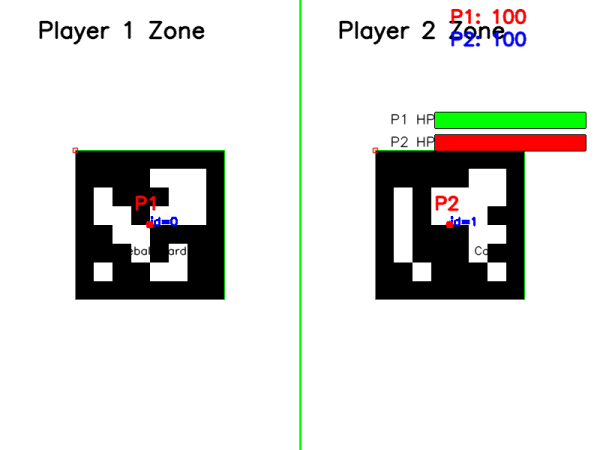


--- Simulated Frame 2 ---
  ATTACK! Card ID 0 (Player 1) attacks Card ID 1 (Player 2)!
  Player 2 takes 10 damage. Player 2 HP: 90


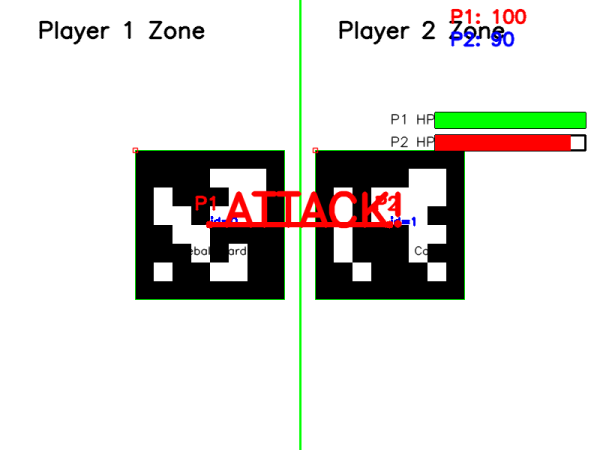


--- Simulated Frame 3 ---
  ATTACK! Card ID 0 (Player 1) attacks Card ID 1 (Player 2)!
  Player 2 takes 10 damage. Player 2 HP: 80


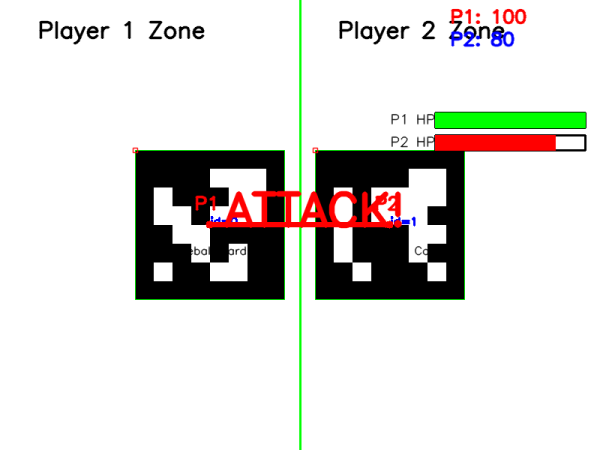


--- Simulated Frame 4 ---
  ATTACK! Card ID 0 (Player 1) attacks Card ID 1 (Player 2)!
  Player 2 takes 10 damage. Player 2 HP: 70


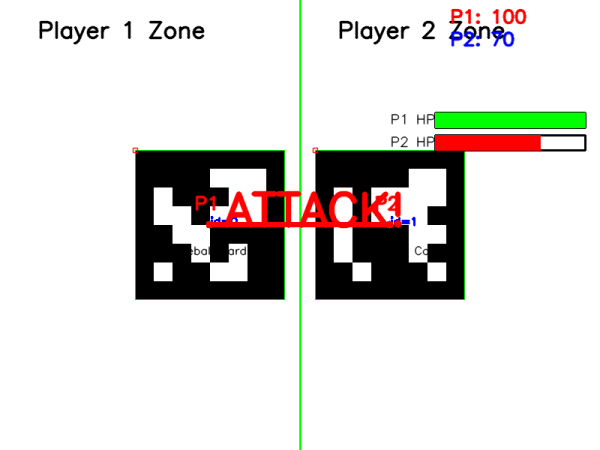


--- Simulated Frame 5 ---
  ATTACK! Card ID 0 (Player 1) attacks Card ID 1 (Player 2)!
  Player 2 takes 10 damage. Player 2 HP: 60


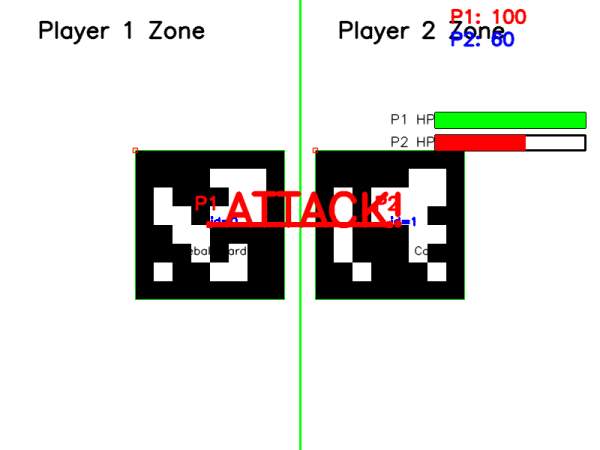


--- Simulated Frame 6 ---
  ATTACK! Card ID 0 (Player 1) attacks Card ID 1 (Player 2)!
  Player 2 takes 10 damage. Player 2 HP: 50


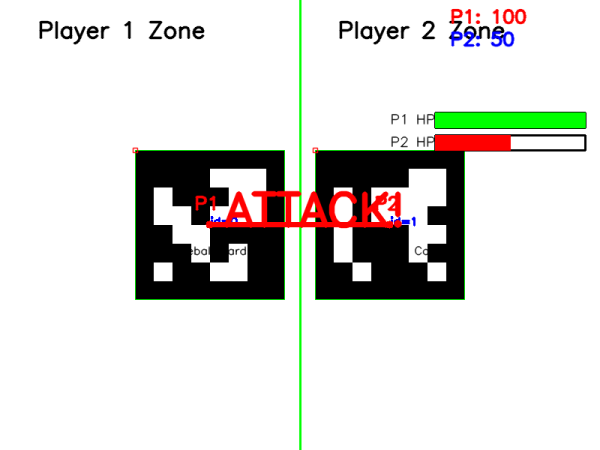


--- Simulated Frame 7 ---
  ATTACK! Card ID 0 (Player 1) attacks Card ID 1 (Player 2)!
  Player 2 takes 10 damage. Player 2 HP: 40


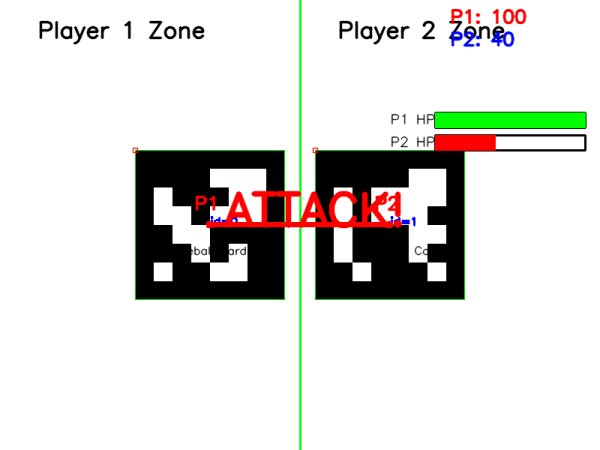


--- Simulated Frame 8 ---
  ATTACK! Card ID 0 (Player 1) attacks Card ID 1 (Player 2)!
  Player 2 takes 10 damage. Player 2 HP: 30


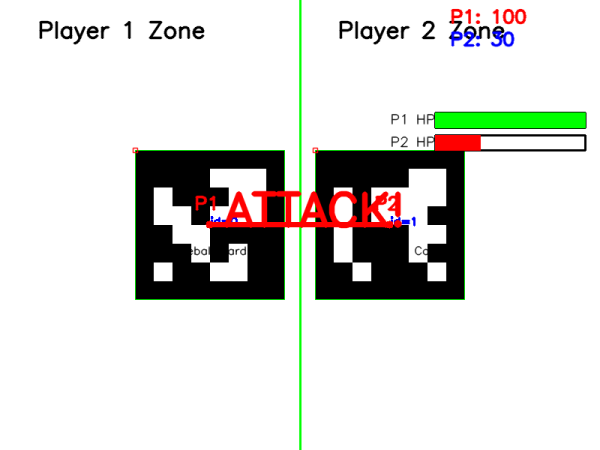


--- Simulated Frame 9 ---
  ATTACK! Card ID 0 (Player 1) attacks Card ID 1 (Player 2)!
  Player 2 takes 10 damage. Player 2 HP: 20


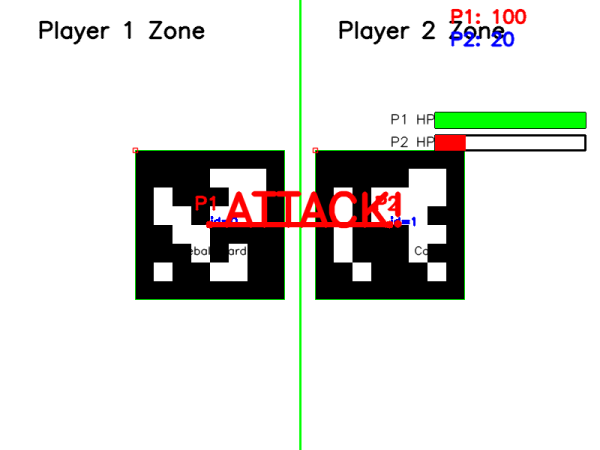


--- Simulated Frame 10 ---
  ATTACK! Card ID 0 (Player 1) attacks Card ID 1 (Player 2)!
  Player 2 takes 10 damage. Player 2 HP: 10


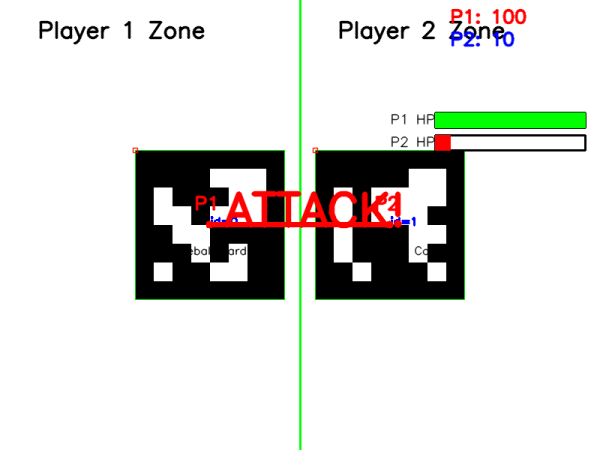


--- Simulated Frame 11 ---
  ATTACK! Card ID 0 (Player 1) attacks Card ID 1 (Player 2)!
  Player 2 takes 10 damage. Player 2 HP: 0


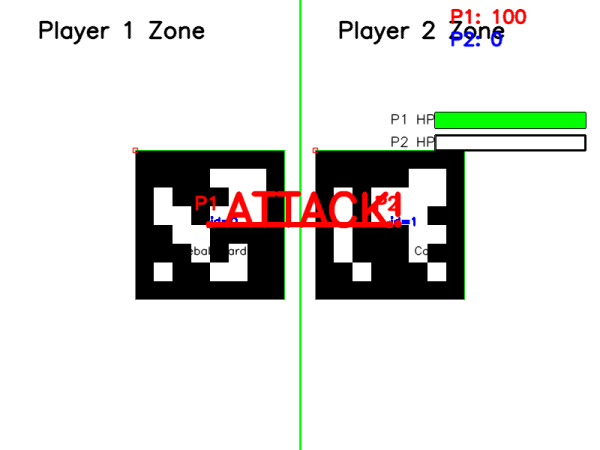

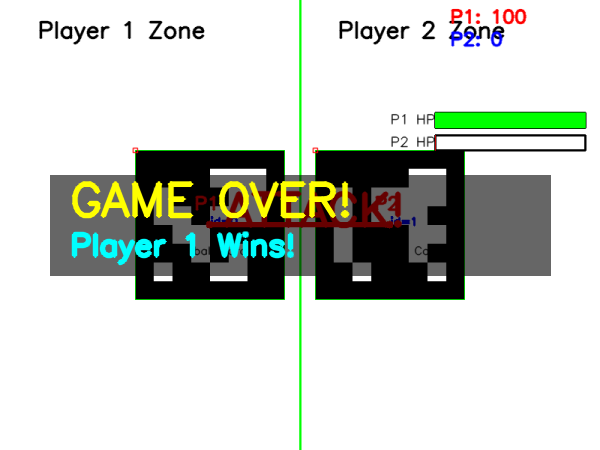


GAME OVER! Player 1 Wins!

Enhanced Game Logic Simulation Finished.
Note: For a live game, this would be a continuous loop processing webcam frames.


In [13]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import time

print("Starting Enhanced Game Logic Simulation with AR Overlays (Revised to trigger GAME OVER)...")

# Initialize ArUco dictionary, parameters, and detector explicitly
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)
aruco_params = cv2.aruco.DetectorParameters()
detector = cv2.aruco.ArucoDetector(aruco_dict, aruco_params)

# Re-initialize HP and define card properties
player1_hp = 100
player2_hp = 100
card_properties = {
    0: {'type': 'Attack', 'damage': 10, 'name': 'Fireball Card'},
    1: {'type': 'Attack', 'damage': 15, 'name': 'Ice Shard Card'}
}

# Define game frame dimensions
frame_width, frame_height = 800, 600
mid_x = frame_width // 2

# Load two different ArUco marker images
output_dir = 'aruco_markers'
marker_0_path = os.path.join(output_dir, 'aruco_marker_0.png') # For Player 1's side
marker_1_path = os.path.join(output_dir, 'aruco_marker_1.png') # For Player 2's side

actual_marker_0 = cv2.imread(marker_0_path)
actual_marker_1 = cv2.imread(marker_1_path)

if actual_marker_0 is None or actual_marker_1 is None:
    print(f"Error: Marker images not found. Expected: {marker_0_path} and {marker_1_path}")
else:
    marker_h, marker_w, _ = actual_marker_0.shape # Assuming both markers are same size

    # --- Simulation Setup: Simulate different scenarios ---
    simulated_frames = []

    # Frame 1: Markers far apart, no attack
    frame_scenario_1 = 255 * np.ones((frame_height, frame_width, 3), dtype=np.uint8)
    x_offset_0_s1 = frame_width // 4 - marker_w // 2
    y_offset_0_s1 = frame_height // 2 - marker_h // 2
    frame_scenario_1[y_offset_0_s1:y_offset_0_s1+marker_h, x_offset_0_s1:x_offset_0_s1+marker_w] = actual_marker_0

    x_offset_1_s1 = frame_width * 3 // 4 - marker_w // 2
    y_offset_1_s1 = frame_height // 2 - marker_h // 2
    frame_scenario_1[y_offset_1_s1:y_offset_1_s1+marker_h, x_offset_1_s1:x_offset_1_s1+marker_w] = actual_marker_1
    simulated_frames.append(frame_scenario_1) # Frame 1

    # Frame 2: Markers close enough for an attack
    x_offset_0_s2 = mid_x - marker_w - 20
    y_offset_0_s2 = frame_height // 2 - marker_h // 2
    frame_scenario_2 = 255 * np.ones((frame_height, frame_width, 3), dtype=np.uint8)
    frame_scenario_2[y_offset_0_s2:y_offset_0_s2+marker_h, x_offset_0_s2:x_offset_0_s2+marker_w] = actual_marker_0

    x_offset_1_s2 = mid_x + 20
    y_offset_1_s2 = frame_height // 2 - marker_h // 2
    frame_scenario_2[y_offset_1_s2:y_offset_1_s2+marker_h, x_offset_1_s2:x_offset_1_s2+marker_w] = actual_marker_1

    # Add enough attack frames to trigger GAME OVER (Player 2 starts at 100 HP, takes 10 damage per attack)
    # Need 10 attacks to reduce P2 HP to 0. We have 1 'safe' frame. Total 11 frames.
    for _ in range(11): # One initial safe frame + 10 attack frames = 11 iterations for simulation
        simulated_frames.append(frame_scenario_2.copy()) # Each of these simulates an attack

    # Optionally, add a final 'safe' frame after game over if needed, but break will handle it
    # simulated_frames.append(frame_scenario_1.copy()) # Final frame after potential game over

    # --- Game Logic Loop ---
    attack_proximity_threshold = 250 # Pixels for attack detection
    game_over = False
    winner = None

    print(f"Running game logic simulation for {len(simulated_frames)} frames...")

    for frame_idx, simulated_camera_frame in enumerate(simulated_frames):
        if game_over:
            break

        print(f"\n--- Simulated Frame {frame_idx+1} ---")
        frame_to_process = simulated_camera_frame.copy()

        # Add zone lines and text
        cv2.line(frame_to_process, (mid_x, 0), (mid_x, frame_height), (0, 255, 0), 2) # Green line for separation
        cv2.putText(frame_to_process, "Player 1 Zone", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)
        cv2.putText(frame_to_process, "Player 2 Zone", (mid_x + 50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)

        gray_frame = cv2.cvtColor(frame_to_process, cv2.COLOR_BGR2GRAY)
        corners, ids, rejected = detector.detectMarkers(gray_frame)

        active_markers = [] # (ID, center_coords, player_zone_string, player_zone_int)

        if ids is not None and len(ids) > 0:
            cv2.aruco.drawDetectedMarkers(frame_to_process, corners, ids)

            for j, marker_id in enumerate(ids):
                c = corners[j][0]
                cX = int(np.mean(c[:, 0]))
                cY = int(np.mean(c[:, 1]))

                player_zone_str = "Player 1" if cX < mid_x else "Player 2"
                player_zone_int = 1 if cX < mid_x else 2

                active_markers.append({'id': marker_id[0], 'center': (cX, cY), 'zone_str': player_zone_str, 'zone_int': player_zone_int})

                cv2.putText(frame_to_process, f"P{player_zone_int}", (cX - 20, cY - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2, cv2.LINE_AA)
                cv2.circle(frame_to_process, (cX, cY), 5, (0, 0, 255), -1) # Draw center point

                # Display card information
                card_info = card_properties.get(marker_id[0], {'name': 'Unknown Card'})
                cv2.putText(frame_to_process, card_info['name'], (cX - 50, cY + 40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)

            # --- Game Interaction Logic (Attack) ---
            p1_markers = [m for m in active_markers if m['zone_int'] == 1]
            p2_markers = [m for m in active_markers if m['zone_int'] == 2]

            attack_happened = False
            if p1_markers and p2_markers:
                for m1 in p1_markers: # Assuming P1's card initiates attack
                    for m2 in p2_markers:
                        dist = np.linalg.norm(np.array(m1['center']) - np.array(m2['center']))
                        if dist < attack_proximity_threshold:
                            attacking_card_id = m1['id']
                            attack_damage = card_properties.get(attacking_card_id, {'damage': 0})['damage']

                            if attack_damage > 0:
                                player2_hp -= attack_damage
                                player2_hp = max(0, player2_hp)
                                print(f"  ATTACK! Card ID {m1['id']} ({m1['zone_str']}) attacks Card ID {m2['id']} ({m2['zone_str']})!")
                                print(f"  Player 2 takes {attack_damage} damage. Player 2 HP: {player2_hp}")
                                attack_happened = True
                                # Prominent visual feedback for attack
                                cv2.line(frame_to_process, m1['center'], m2['center'], (0, 0, 255), 5) # Thicker red line
                                cv2.putText(frame_to_process, "ATTACK!", (mid_x - 100, frame_height // 2), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 5, cv2.LINE_AA) # Larger text

                            break
                    if attack_happened:
                        break

            if not attack_happened:
                print("  No attack detected in this frame.")

        else:
            print("No ArUco markers detected in this simulated frame.")
            print("  No attack detected in this frame.") # Keep for consistency with previous iterations

        # --- Dynamic Health Bars ---
        # Max HP for calculation (assuming 100 max HP)
        max_hp = 100
        hp_bar_width = 200
        hp_bar_height = 20
        hp_bar_y_offset = 150 # Position below existing text

        # Player 1 Health Bar (Green)
        p1_hp_current_width = int((player1_hp / max_hp) * hp_bar_width)
        cv2.rectangle(frame_to_process, (frame_width - hp_bar_width - 20, hp_bar_y_offset), (frame_width - 20, hp_bar_y_offset + hp_bar_height), (0, 0, 0), 2) # Outline
        cv2.rectangle(frame_to_process, (frame_width - hp_bar_width - 20, hp_bar_y_offset), (frame_width - hp_bar_width - 20 + p1_hp_current_width, hp_bar_y_offset + hp_bar_height), (0, 255, 0), -1) # Filled bar
        cv2.putText(frame_to_process, f"P1 HP", (frame_width - hp_bar_width - 80, hp_bar_y_offset + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 1, cv2.LINE_AA)

        # Player 2 Health Bar (Red)
        p2_hp_current_width = int((player2_hp / max_hp) * hp_bar_width)
        cv2.rectangle(frame_to_process, (frame_width - hp_bar_width - 20, hp_bar_y_offset + hp_bar_height + 10), (frame_width - 20, hp_bar_y_offset + hp_bar_height + 10 + hp_bar_height), (0, 0, 0), 2) # Outline
        cv2.rectangle(frame_to_process, (frame_width - hp_bar_width - 20, hp_bar_y_offset + hp_bar_height + 10), (frame_width - hp_bar_width - 20 + p2_hp_current_width, hp_bar_y_offset + hp_bar_height + 10 + hp_bar_height), (0, 0, 255), -1) # Filled bar
        cv2.putText(frame_to_process, f"P2 HP", (frame_width - hp_bar_width - 80, hp_bar_y_offset + hp_bar_height + 10 + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 1, cv2.LINE_AA)

        # --- Update HP Text Display ---
        cv2.putText(frame_to_process, f"P1: {player1_hp}", (frame_width - 200, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2, cv2.LINE_AA)
        cv2.putText(frame_to_process, f"P2: {player2_hp}", (frame_width - 200, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2, cv2.LINE_AA)

        # --- Check Game Over Condition ---
        if player1_hp <= 0 or player2_hp <= 0:
            game_over = True
            if player1_hp <= 0 and player2_hp <= 0:
                winner = "Draw!"
            elif player1_hp <= 0:
                winner = "Player 2 Wins!"
            else:
                winner = "Player 1 Wins!"

        # Display the frame
        display_frame = cv2.resize(frame_to_process, (int(frame_width * 0.75), int(frame_height * 0.75)), interpolation=cv2.INTER_AREA)
        cv2_imshow(display_frame)

        if game_over:
            # Display GAME OVER message in the final frame
            final_frame = display_frame.copy()
            overlay = final_frame.copy()
            cv2.rectangle(overlay, (50, int(frame_height*0.75)//2 - 50), (int(frame_width*0.75) - 50, int(frame_height*0.75)//2 + 50), (0, 0, 0), -1)
            alpha = 0.6
            final_frame = cv2.addWeighted(overlay, alpha, final_frame, 1 - alpha, 0)

            cv2.putText(final_frame, "GAME OVER!", (70, int(frame_height*0.75)//2 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 255), 4, cv2.LINE_AA)
            cv2.putText(final_frame, winner, (70, int(frame_height*0.75)//2 + 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 3, cv2.LINE_AA)
            cv2_imshow(final_frame)
            print(f"\nGAME OVER! {winner}")
            time.sleep(5) # Keep game over screen visible for a bit
            break # Exit the loop once game is over

        time.sleep(2) # Longer delay to observe changes

    print("\nEnhanced Game Logic Simulation Finished.")
    print("Note: For a live game, this would be a continuous loop processing webcam frames.")


## Final Task

### Subtask:
Provide a summary of the implemented AR marker-based card game, including a description of its features and how it uses ArUco markers and OpenCV to create an interactive augmented reality experience.


## Summary:

### Q&A
The implemented AR marker-based card game features real-time detection and identification of physical cards using ArUco markers and OpenCV. It creates an interactive augmented reality experience by overlaying virtual game elements onto a simulated live webcam feed. Key features include:

*   **ArUco Marker Generation:** Unique ArUco markers (IDs 0-9) are generated, saved as images, and can be printed to serve as physical game cards.
*   **Real-time Marker Detection:** OpenCV's ArUco module continuously detects these markers within a video stream, extracting their unique IDs and corner coordinates.
*   **Player Zone Assignment:** Based on the marker's central X-coordinate, cards are dynamically assigned to either Player 1 (left zone) or Player 2 (right zone).
*   **Basic Game Logic:** The game tracks player health points (initially 100 HP each) and implements a proximity-based attack mechanic. If a Player 1 card and a Player 2 card are brought within a defined distance (e.g., 250 pixels), the Player 1 card attacks, dealing damage to Player 2's HP.
*   **Visual AR Overlay:** The simulated video feed displays dynamic health bars, card names, prominent "ATTACK!" messages during interactions, and a "GAME OVER!" screen when a player's health reaches zero.

The system uses ArUco markers as tangible representations of game cards, allowing players to interact with the virtual game environment simply by manipulating physical objects under a camera. OpenCV provides the core computer vision capabilities for marker detection and the framework for drawing AR overlays.

### Data Analysis Key Findings

*   **ArUco Marker Generation:** 10 ArUco markers (IDs 0 to 9) from the `DICT_6X6_250` dictionary were successfully generated, saved as 200x200 pixel PNG images, and displayed.
*   **Webcam Initialization (Simulated):** Direct webcam access failed in the remote Colab environment. The system successfully demonstrated continuous frame processing using a simulated video feed with placeholder images.
*   **Marker Detection & Identification:** ArUco markers were successfully detected within simulated frames, their IDs (e.g., ID 0) and corner coordinates were extracted, and visual outlines were drawn around them. A key finding was the necessity to embed markers within a larger simulated camera frame for successful detection, rather than processing the marker image alone.
*   **Player Zone Assignment:** Markers were accurately assigned to "Player 1 Zone" (left side) or "Player 2 Zone" (right side) based on their central X-coordinate relative to the frame's midpoint, with visual overlays confirming the assignment (e.g., "P1", "P2").
*   **Basic Game Logic Implementation:**
    *   Player health points were initialized to 100 for each player.
    *   Card properties were defined, assigning an 'Attack' type and damage value (e.g., Card ID 0: 10 damage, Card ID 1: 15 damage).
    *   A proximity-based attack mechanism was successfully implemented: when a Player 1 card (ID 0) and a Player 2 card (ID 1) were detected within a `250` pixel threshold, Player 1's card attacked Player 2, reducing Player 2's HP.
*   **Visual AR Overlay & Game State:**
    *   Dynamic health bars visually representing player HP were successfully implemented, decreasing in length as damage was applied.
    *   Card names (e.g., "Fireball Card") were displayed next to detected markers.
    *   "ATTACK!" messages were prominently displayed with visual effects (thicker red line, larger text) during attack interactions.
    *   The simulation successfully led to a "GAME OVER!" state, with "Player 1 Wins!" being declared after Player 2's HP was reduced to 0 by repeated attacks.

### Insights or Next Steps

*   **Local Deployment:** The primary next step is to adapt and run this system in a local Python environment with a live webcam feed to enable true interactive AR gameplay. This would allow for testing with physical cards and real-time player actions.
*   **Expand Game Mechanics:** Introduce more complex game logic, such as different card types (e.g., defense, healing), special abilities, multiple cards per player zone, and a turn-based system or real-time cooldowns to enhance strategic depth.
